### PREDIKSI HARGA PENJUALAN MOBIL BEKAS MENGGUNAKAN METODE RANDOM FOREST



### 1. Mengimpor Library

In [280]:
#Mengimpor library yang diperlukan
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

#untuk melakukan plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### 2. Membaca File

In [281]:
#membaca file tipe csv

raw_df = pd.read_csv('datamobil.csv')
raw_df

,Merk_Mobil,Tahun,Harga_Jual,Harga_Saat_Ini,Kilometer,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan
0,Daihatsu Ayla 1.0,2013,85,145,130000,Bensin,Dealer,Automatic,0
1,Daihatsu Ayla 1.0,2013,92,145,68000,Bensin,Individual,Automatic,0
2,Daihatsu Ayla 1.0,2014,85,145,40000,Bensin,Dealer,Automatic,0
3,Daihatsu Ayla 1.0,2014,78,145,98000,Bensin,Dealer,Manual,1
4,Daihatsu Ayla 1.0,2015,85,145,95000,Bensin,Individual,Manual,0
...,...,...,...,...,...,...,...,...,...
206,Toyota Rush G AT,2020,225,290,45000,Bensin,Individual,Automatic,0
207,Toyota Rush G AT,2020,241,290,25000,Bensin,Individual,Automatic,0
208,Toyota Rush G AT,2021,238,290,15000,Bensin,Dealer,Automatic,0
209,Toyota Rush G AT,2021,251,290,5000,Bensin,Dealer,Automatic,0


In [282]:
#shape
raw_df.shape

(211, 9)

### 3. EDA + Data Treatment

In [283]:
#Jumlah baris dan kolom

print('The dataset has: \n {} no. of rows \n {} no. of columns'.format(raw_df.shape[0],raw_df.shape[1]))

The dataset has: 
 211 no. of rows 
 9 no. of columns


In [284]:
# memeriksa informasi umum

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Merk_Mobil         211 non-null    object
 1   Tahun              211 non-null    int64 
 2   Harga_Jual         211 non-null    int64 
 3   Harga_Saat_Ini     211 non-null    int64 
 4   Kilometer          211 non-null    int64 
 5   Jenis_Bahan_Bakar  211 non-null    object
 6   Tipe_Penjual       211 non-null    object
 7   Transmisi          211 non-null    object
 8   Kepemilikan        211 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 15.0+ KB


In [285]:
len(raw_df['Merk_Mobil'].unique())

19

### Pengamatan:
#### 1. Dataset memiliki 4 variabel yang berisi data bertipe string -----> Categorical Variable
#### 2. Dataset memiliki 5 variabel yang berisi data tipe integer -----> Variabel Numerik
#### 3. Dataset tidak memiliki nilai null

In [286]:
#nama kolom
col_raw = raw_df.columns
col_raw

Index(['Merk_Mobil', 'Tahun', 'Harga_Jual', 'Harga_Saat_Ini', 'Kilometer',
       'Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi', 'Kepemilikan'],
      dtype='object')

In [287]:
#Memisahkan variabel kategorikal dari numerik

cat_v = ['Merk_Mobil','Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi']
num_v = [v for v in col_raw if v not in cat_v]
num_v

['Tahun', 'Harga_Jual', 'Harga_Saat_Ini', 'Kilometer', 'Kepemilikan']

In [288]:
#Mengatur ulang urutan kolom

raw_df = raw_df [['Merk_Mobil', 'Tahun', 'Kilometer',
                  'Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi', 'Kepemilikan','Harga_Saat_Ini', 'Harga_Jual']]
raw_df.head()

,Merk_Mobil,Tahun,Kilometer,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan,Harga_Saat_Ini,Harga_Jual
0,Daihatsu Ayla 1.0,2013,130000,Bensin,Dealer,Automatic,0,145,85
1,Daihatsu Ayla 1.0,2013,68000,Bensin,Individual,Automatic,0,145,92
2,Daihatsu Ayla 1.0,2014,40000,Bensin,Dealer,Automatic,0,145,85
3,Daihatsu Ayla 1.0,2014,98000,Bensin,Dealer,Manual,1,145,78
4,Daihatsu Ayla 1.0,2015,95000,Bensin,Individual,Manual,0,145,85


In [289]:
#Memeriksa distribusi data kategorikal

for i in cat_v:
    print(raw_df[i].value_counts(dropna = False))

Daihatsu Ayla 1.0             20
Daihatsu Terios               20
Daihatsu Sigra 1.2 R MT       20
Honda City Sedan              18
Honda CR-V Prestige           17
Honda Mobilio                 14
Honda HR-V 1.5 E              12
Mitsubishi Pajero Sport       11
Mitsubishi Outlander PX       10
Toyota Agya G AT              10
Toyota Kijang Innova 2.0 G    10
Toyota Avanza 1.5 Veloz        9
Toyota Rush G AT               9
Honda CR-V 2.0                 8
Nissan Grand Livina            7
Suzuki Ertiga GL AT            6
Toyota Fortuner SUV            5
Suzuki Ignis Hatchback         3
Suzuki Ertiga GX MT            2
Name: Merk_Mobil, dtype: int64
Bensin    195
Solar      16
Name: Jenis_Bahan_Bakar, dtype: int64
Dealer        152
Individual     59
Name: Tipe_Penjual, dtype: int64
Automatic    149
Manual        62
Name: Transmisi, dtype: int64


In [290]:
#Fungsi untuk mencetak tinggi barchart pada batang

def barh(ax): # untuk mendapatkan ketinggian
    
    for p in ax.patches:
        val = p.get_height() #ketinggian bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))


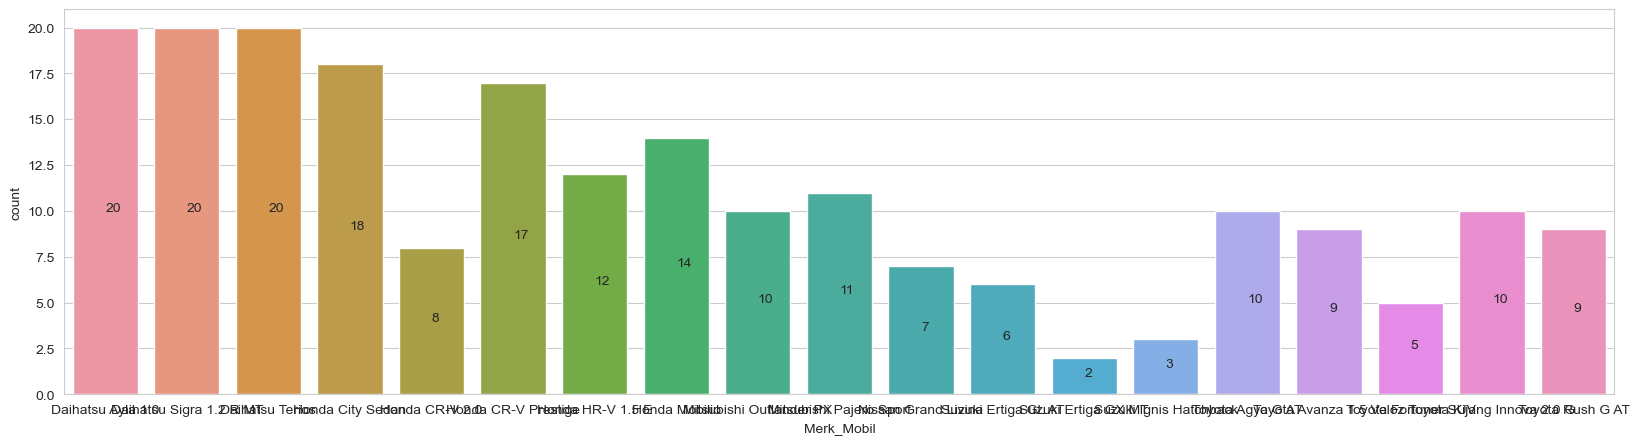

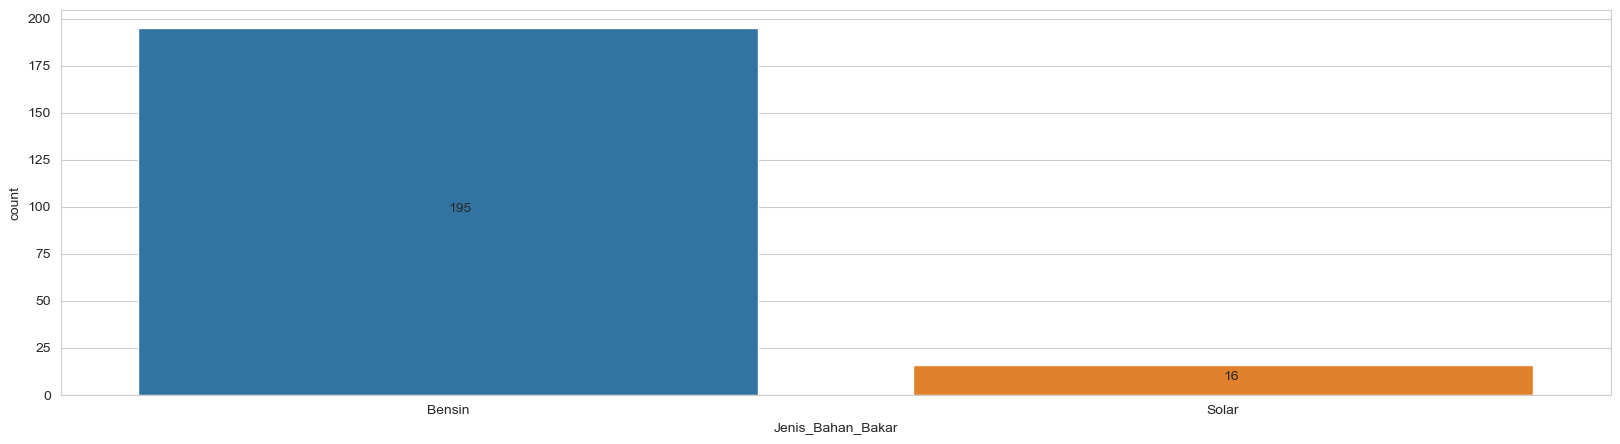

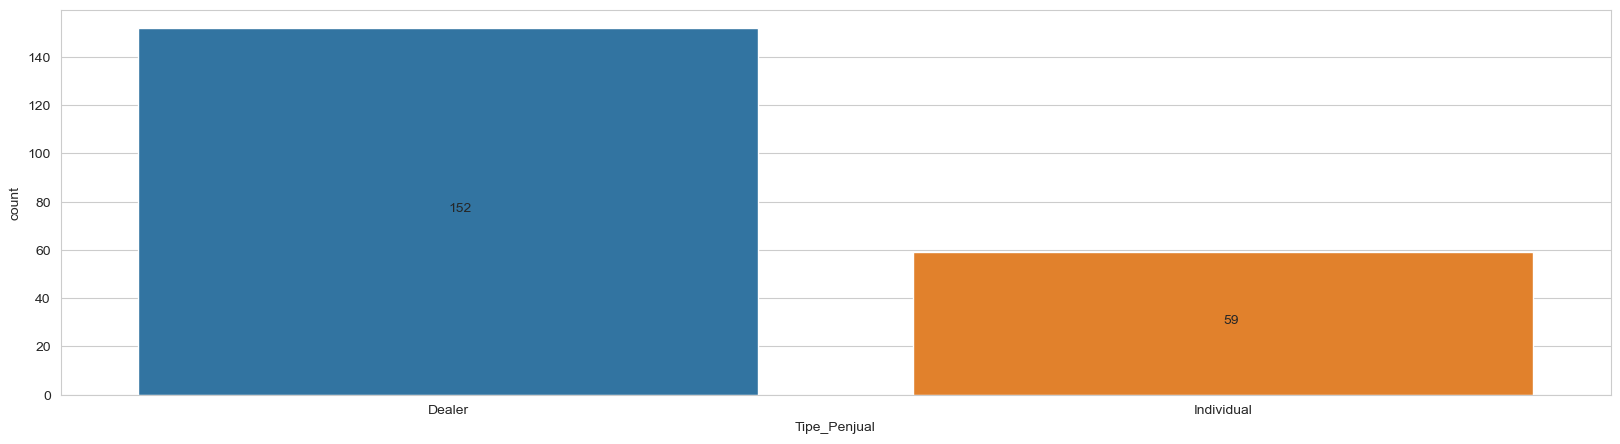

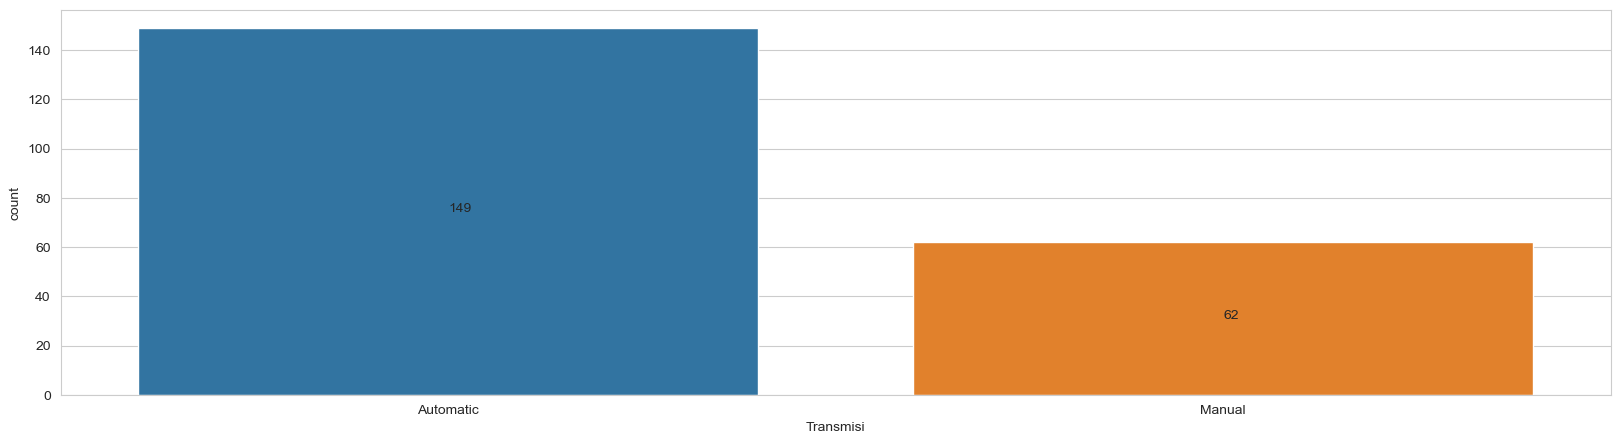

In [291]:
#Melakukan plot

for i in cat_v:  #Mengulang variabel kategorikal dan merencanakan distribusinya
    plt.figure(figsize=(20,5))
    ax = sns.countplot(data = raw_df, x=i)
    barh(ax)
    plt.show()
    

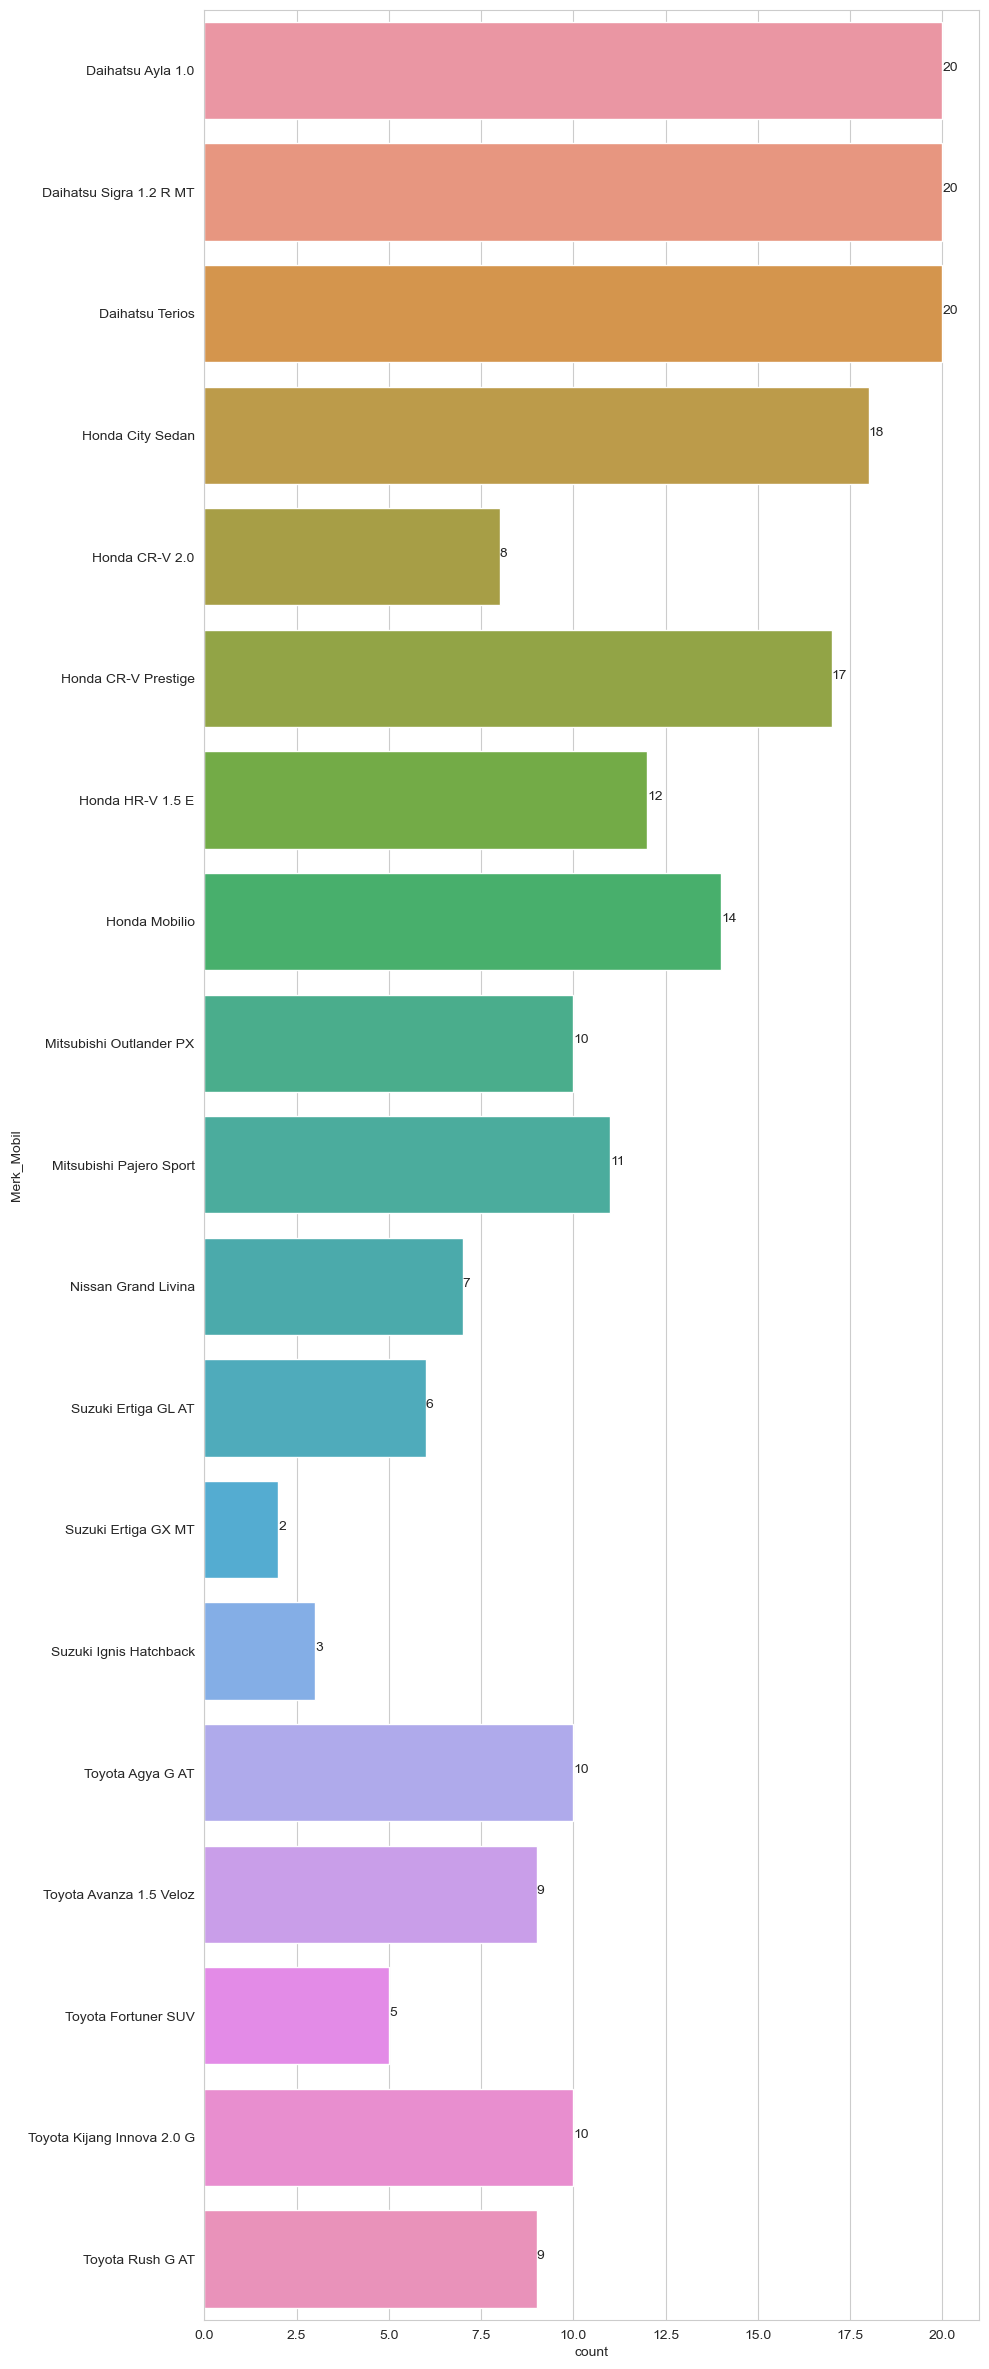

In [292]:
#Melihat distribusi dari merk mobil

# Fungsi untuk mencetak lebar barchart pada batang

def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #Ketinggian bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))


plt.figure(figsize=(10,30))
ax0 = sns.countplot(data = raw_df, y ='Merk_Mobil',)
barw(ax0)
plt.show()

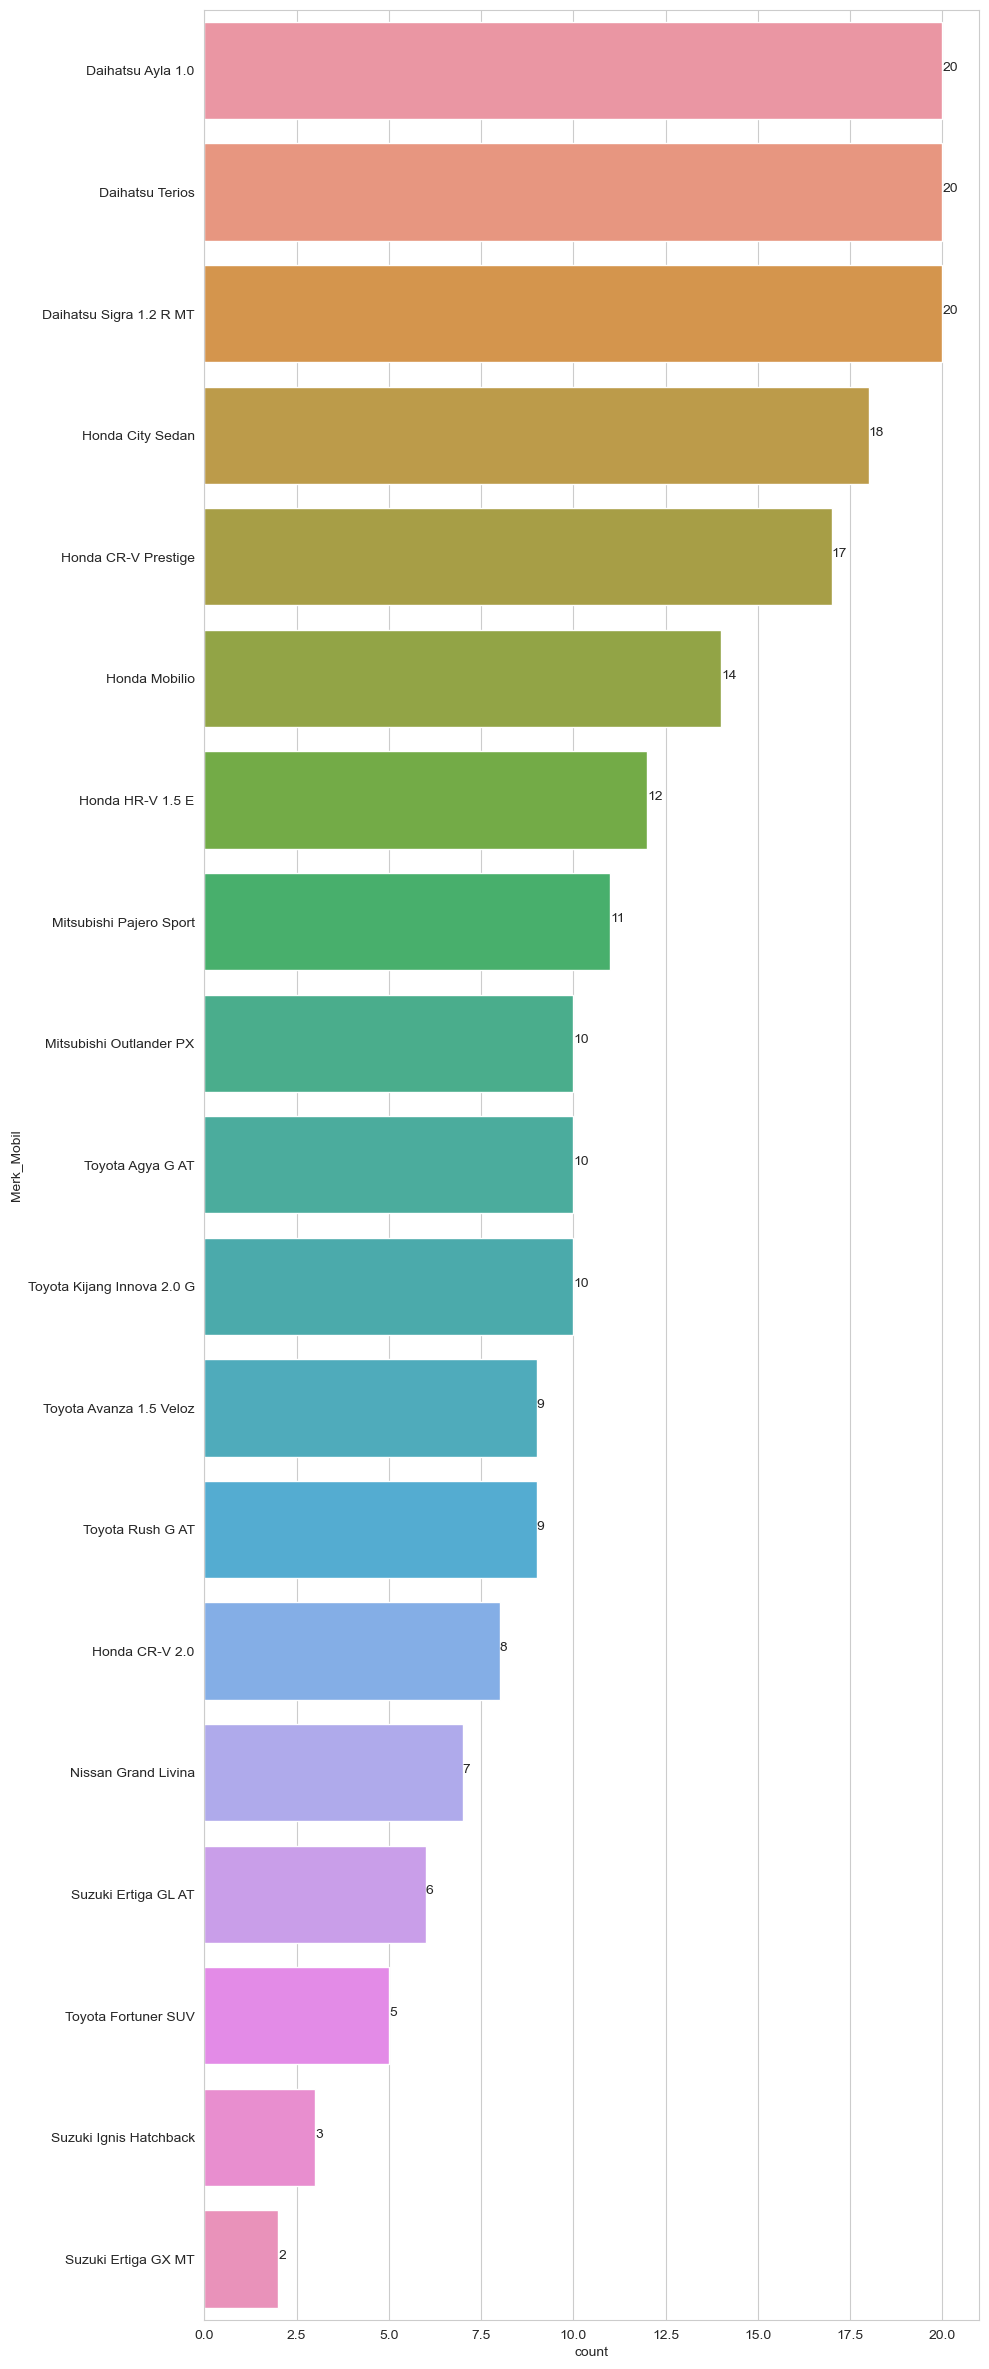

In [293]:
# kita dapat melihat bahwa Daihatsu E memiliki frekuensi tertinggi
# mari kita urutkan dari terbesar ke terkecil

# mari kita lihat distribusi merk mobil lagi

plt.figure(figsize=(10,30))
ax1 = sns.countplot(data = raw_df, y ='Merk_Mobil', order = raw_df['Merk_Mobil'].value_counts().index) # order = raw_df['Merk_Mobil'].value_counts().index
barw(ax1)
plt.show()

### Pengamatan:
#### 1. Mobil dengan bahan bakar bensin paling disukai
#### 2. Kebanyakan orang cenderung membeli dari dealer mobil daripada penjual individu
#### 3. Orang-orang sepertinya lebih menyukai mobil otomatis daripada mobil manual
#### 4. Merk mobil Daihatsu memiliki popularitas tinggi

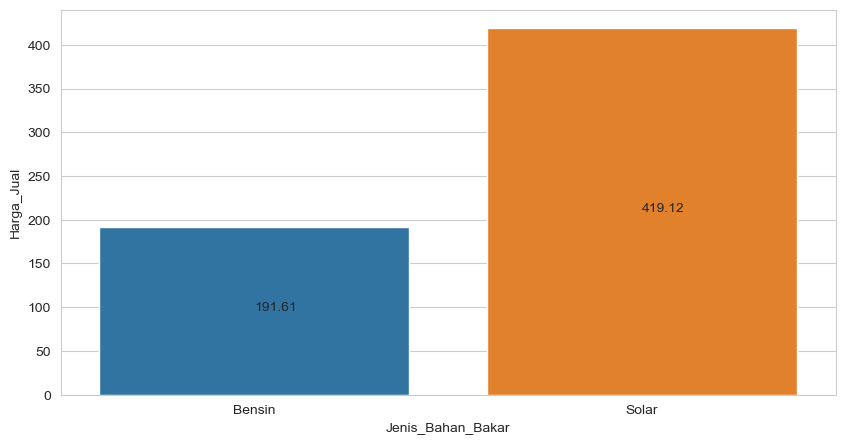

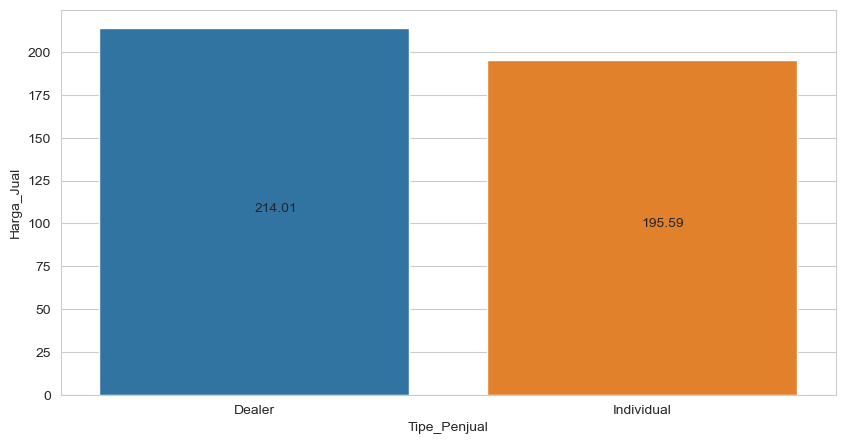

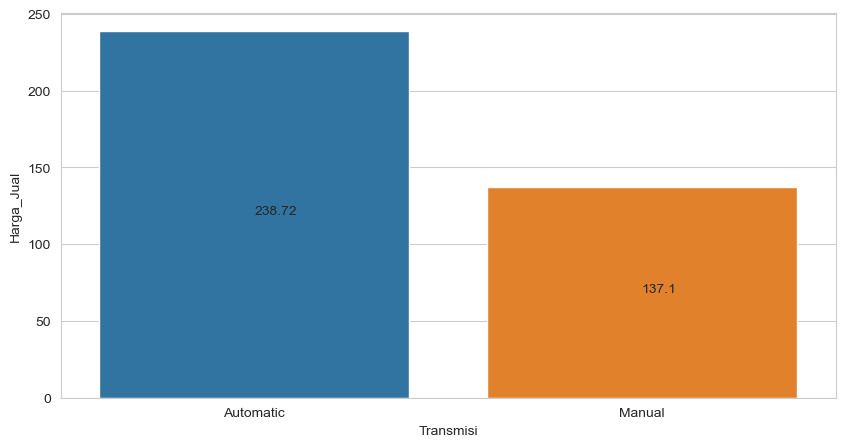

In [294]:
# memeriksa distribusi variabel kategori sehubungan dengan harga jual
for i in [c for c in cat_v if c != 'Merk_Mobil']:
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    ax3 = sns.barplot(data = raw_df, x=i, y ='Harga_Jual',ci=None,estimator = np.mean)
    barh(ax3)
    plt.show()

In [295]:
# Mengelompokkan seluruh dataset berdasarkan Merk_Mobil kemudian mengurutkan dalam urutan menurun
# Kemudian dapat ditemukan mobil yang memiliki harga_jual tertinggi
# Tujuannya untuk melakukan plot dalam urutan menurun

df_gc = raw_df.groupby('Merk_Mobil').mean()
df_gc.reset_index(inplace= True)
df_gc[['Merk_Mobil','Harga_Jual']].sort_values('Harga_Jual', ascending =False)


,Merk_Mobil,Harga_Jual
16,Toyota Fortuner SUV,461.800000
9,Mitsubishi Pajero Sport,399.727273
4,Honda CR-V Prestige,354.235294
3,Honda CR-V 2.0,296.875000
6,Honda HR-V 1.5 E,247.500000
17,Toyota Kijang Innova 2.0 G,240.500000
5,Honda City Sedan,224.666667
18,Toyota Rush G AT,207.111111
8,Mitsubishi Outlander PX,201.700000
2,Daihatsu Terios,173.300000


In [296]:
type( df_gc.sort_values('Harga_Jual',ascending =False)['Merk_Mobil'] )

pandas.core.series.Series

In [297]:
# Mengelompokkan berdasarkan Nama_Mobil

# df_gc = raw_df [['Car_Name', 'Selling_Price']].groupby('Car_Name').agg({'Selling_Price':'mean'})
# df_gc.reset_index(inplace=True)
# df_gc

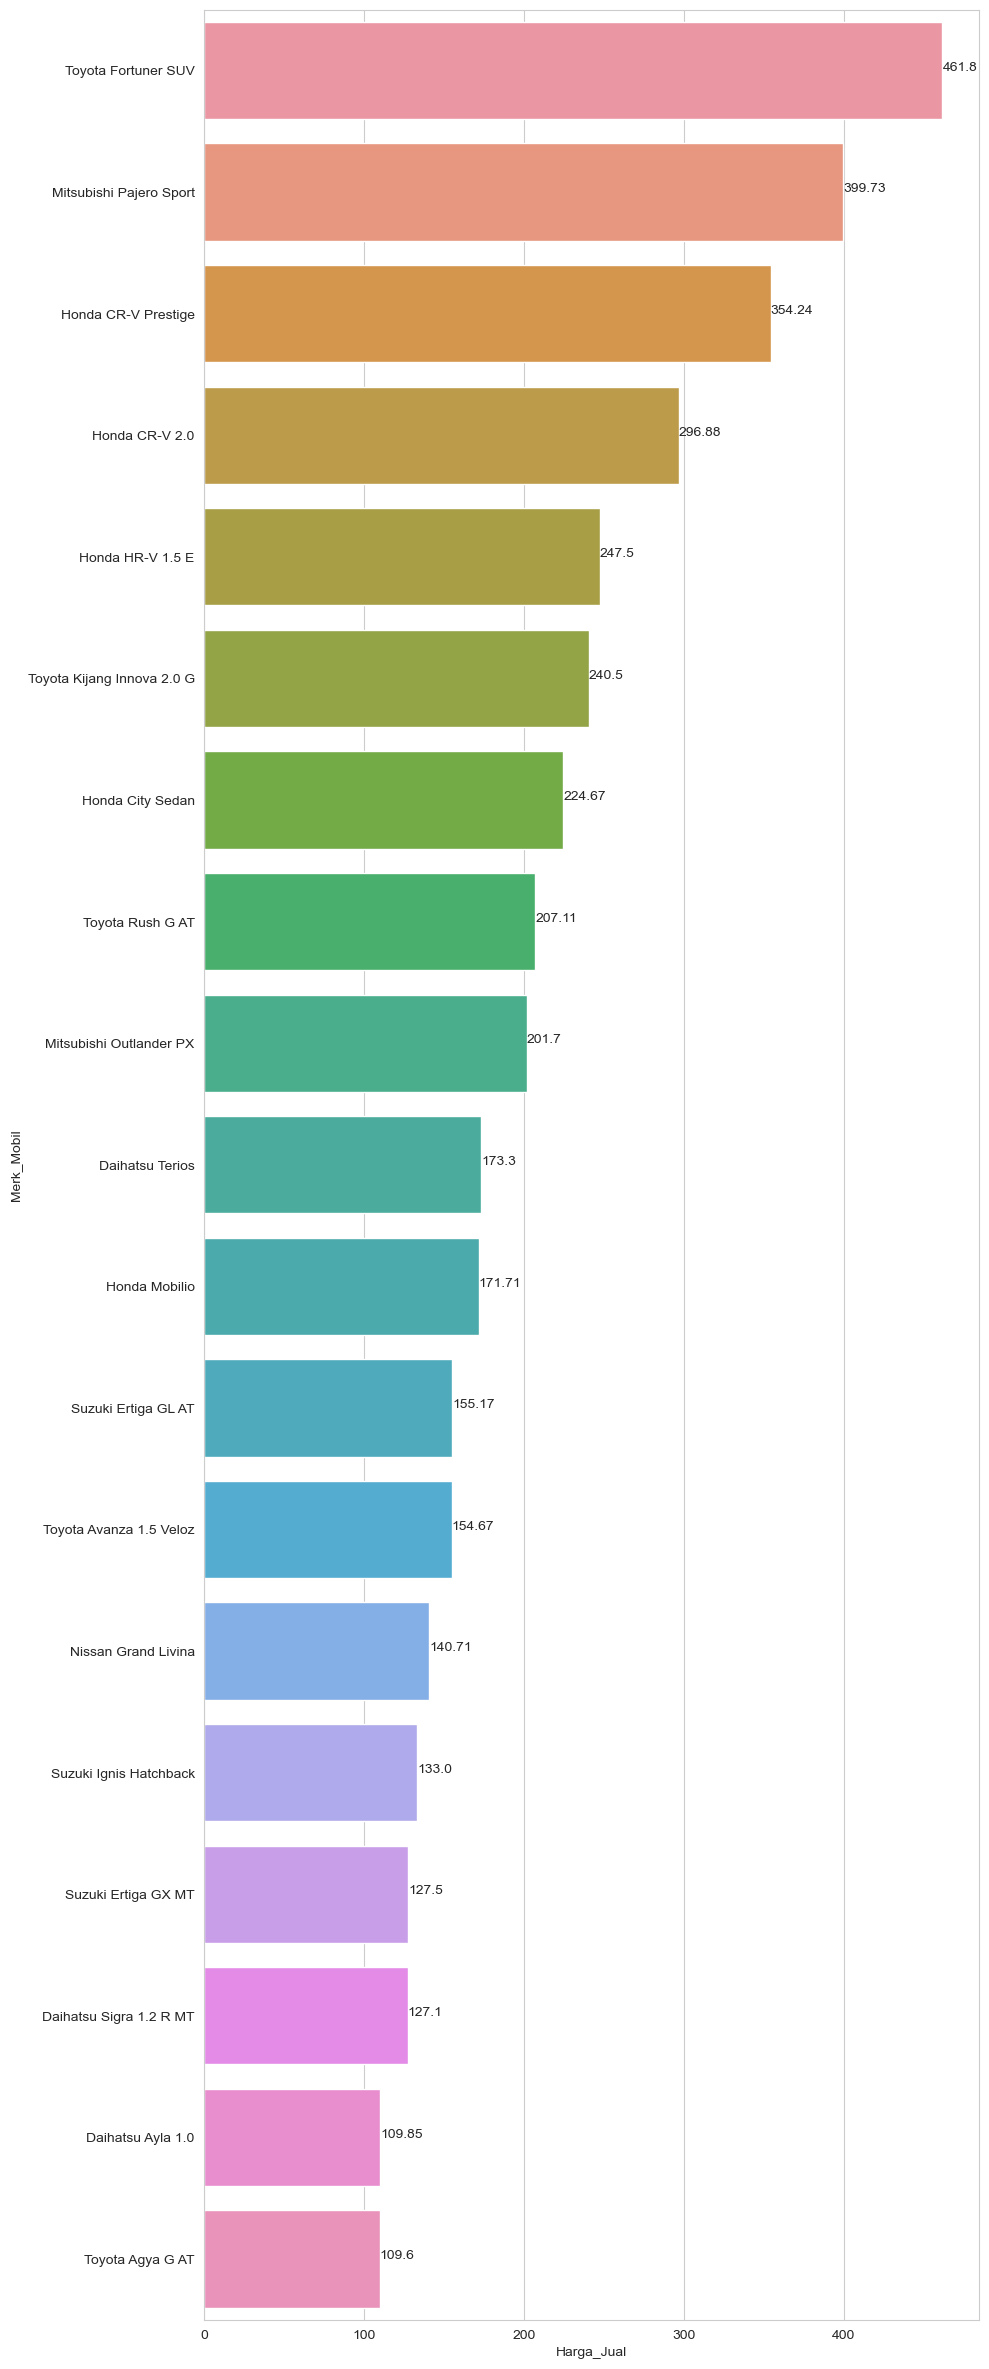

In [298]:


plt.figure(figsize=(10,30))
ax1 = sns.barplot(data = raw_df, x='Harga_Jual', y ='Merk_Mobil', order = df_gc.sort_values('Harga_Jual',ascending =False)['Merk_Mobil'], ci =None) 
                    # order = df_gc.sort_values('Harga_Jual',ascending =False)['Merk_Mobil'] - Hanya memberikan rangkaian semua merk mobil untuk dicetak
                    # membuat nama pesanan ini dengan menyortir kolom Selling_Price dari kerangka data df_gc
barw(ax1)
plt.show()

### Observations:

#### 1. Kendaraan dengan jenis bahan bakar solar memiliki harga jual tertinggi 
#### 2. Dealer memiliki efek lebih tinggi dalam menjual kendaraan apa pun
#### 3. Kendaraan tipe Automatic memiliki harga jual tertinggi
#### 4. Toyota Fortuner SUV memiliki harga jual tertinggi

### Mari kita periksa distribusi variabel numerik

In [299]:
#variabel numerik
num_v

['Tahun', 'Harga_Jual', 'Harga_Saat_Ini', 'Kilometer', 'Kepemilikan']

In [300]:
raw_df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])

,Tahun,Kilometer,Kepemilikan,Harga_Saat_Ini,Harga_Jual
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,2017.118483,61107.611374,0.113744,326.364929,208.862559
std,2.674427,37596.017716,0.318255,155.733639,106.870839
min,2013.000000,1900.000000,0.000000,145.000000,78.000000
5%,2013.000000,9500.000000,0.000000,145.000000,99.000000
25%,2015.000000,29204.500000,0.000000,218.500000,134.000000
35%,2016.000000,40000.000000,0.000000,232.000000,146.500000
50%,2017.000000,60000.000000,0.000000,298.000000,177.000000
75%,2019.000000,90000.000000,0.000000,370.000000,243.500000
85%,2020.000000,103000.000000,0.000000,549.000000,301.000000


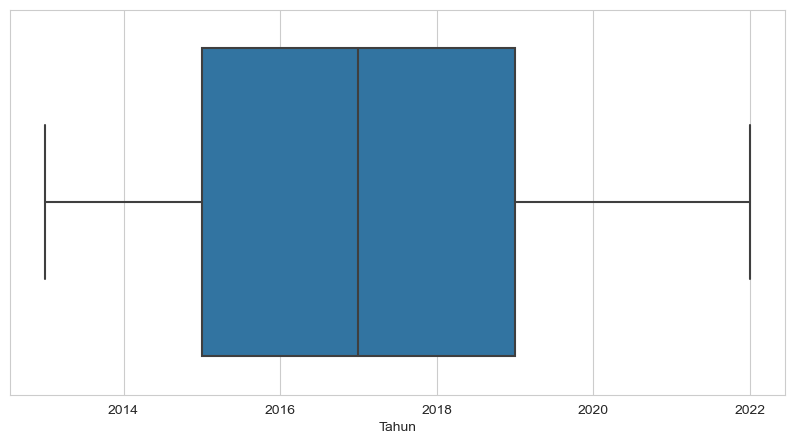

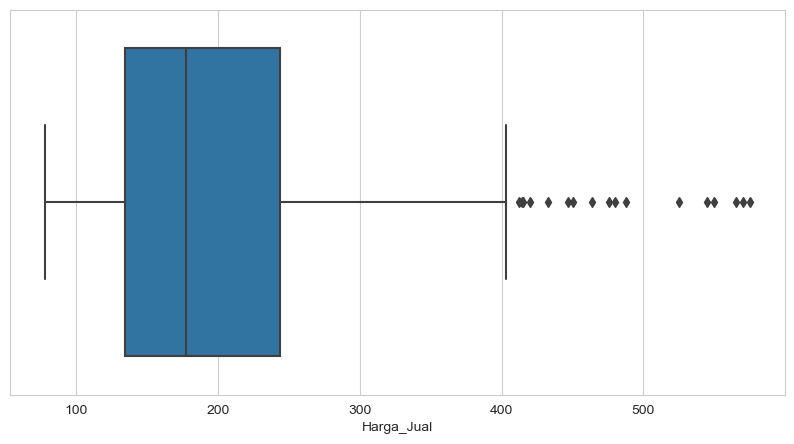

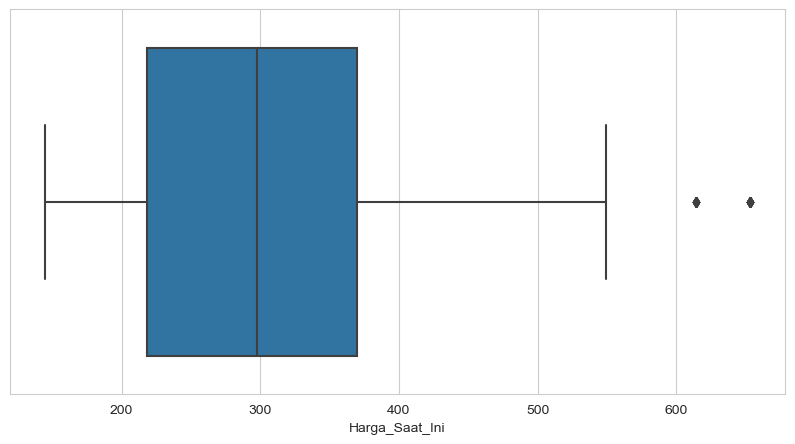

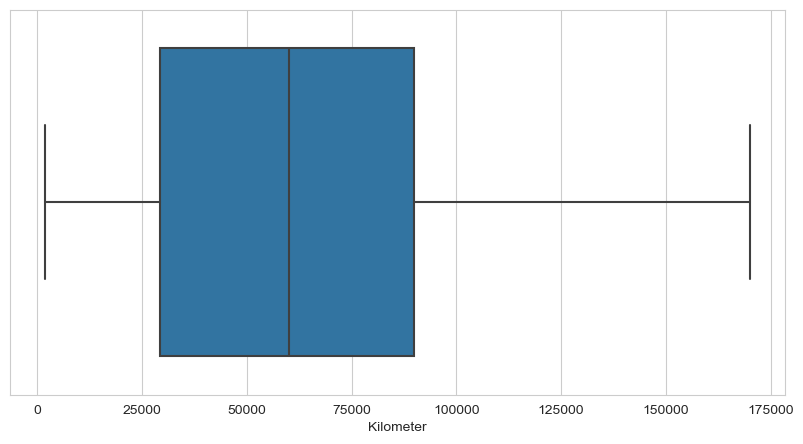

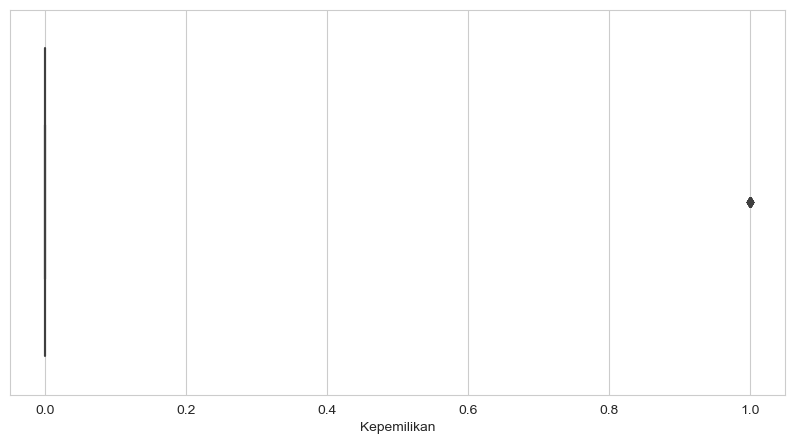

In [301]:
for i in num_v:
    plt.figure(figsize=(10,5))
    sns.boxplot(data= raw_df, x =i)
    plt.show()

In [302]:
raw_df['Kepemilikan'].value_counts()

0    187
1     24
Name: Kepemilikan, dtype: int64

### Pengamatan:
#### 1. Outlier ditampilkan dalam kilometer dan menampilkan harga

<Figure size 3000x1500 with 0 Axes>

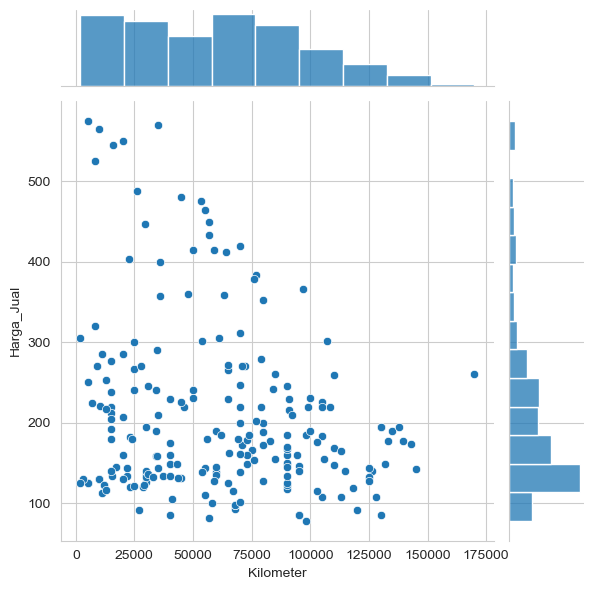

In [303]:
#To see both scaterplot with histogram (distribution of each varible)
plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Kilometer',y = 'Harga_Jual')
plt.show()

<Figure size 3000x1500 with 0 Axes>

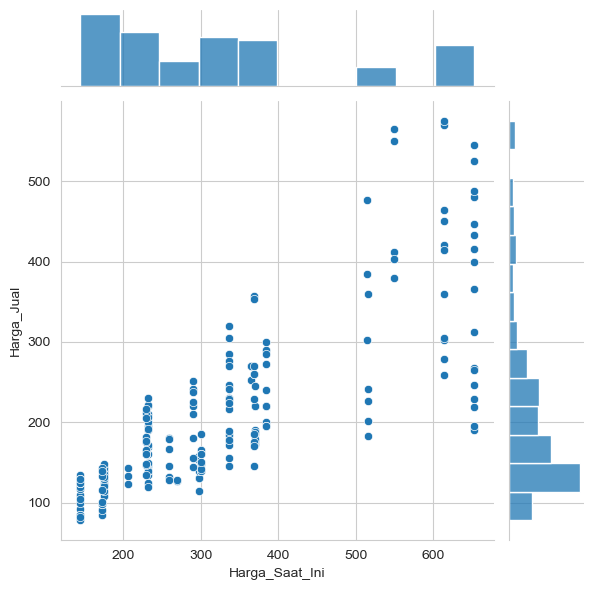

In [304]:
plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Harga_Saat_Ini',y = 'Harga_Jual')
plt.show()

In [305]:
raw_df.loc[((raw_df['Harga_Saat_Ini'] ==500.000000 ) | (raw_df['Kilometer'] ==170000.000000)),:]

,Merk_Mobil,Tahun,Kilometer,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan,Harga_Saat_Ini,Harga_Jual
196,Toyota Kijang Innova 2.0 G,2016,170000,Bensin,Individual,Automatic,0,369,260


In [306]:
raw_df.loc[((raw_df['Merk_Mobil'] =='Toyota Kijang Innova 2.0 G' )|(raw_df['Harga_Saat_Ini'] ==369.000000 ) | (raw_df['Kilometer'] ==170000.000000)),:]

,Merk_Mobil,Tahun,Kilometer,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan,Harga_Saat_Ini,Harga_Jual
191,Toyota Kijang Innova 2.0 G,2013,90000,Bensin,Individual,Manual,0,369,145
192,Toyota Kijang Innova 2.0 G,2014,40000,Bensin,Individual,Manual,0,369,229
193,Toyota Kijang Innova 2.0 G,2014,103000,Bensin,Dealer,Automatic,0,369,176
194,Toyota Kijang Innova 2.0 G,2015,90000,Bensin,Individual,Automatic,0,369,170
195,Toyota Kijang Innova 2.0 G,2015,90000,Bensin,Individual,Manual,0,369,185
196,Toyota Kijang Innova 2.0 G,2016,170000,Bensin,Individual,Automatic,0,369,260
197,Toyota Kijang Innova 2.0 G,2016,85000,Bensin,Individual,Manual,0,369,260
198,Toyota Kijang Innova 2.0 G,2018,71000,Bensin,Individual,Automatic,0,369,270
199,Toyota Kijang Innova 2.0 G,2019,36000,Bensin,Dealer,Automatic,1,369,357
200,Toyota Kijang Innova 2.0 G,2017,79746,Bensin,Dealer,Automatic,0,369,353


<Figure size 3000x1500 with 0 Axes>

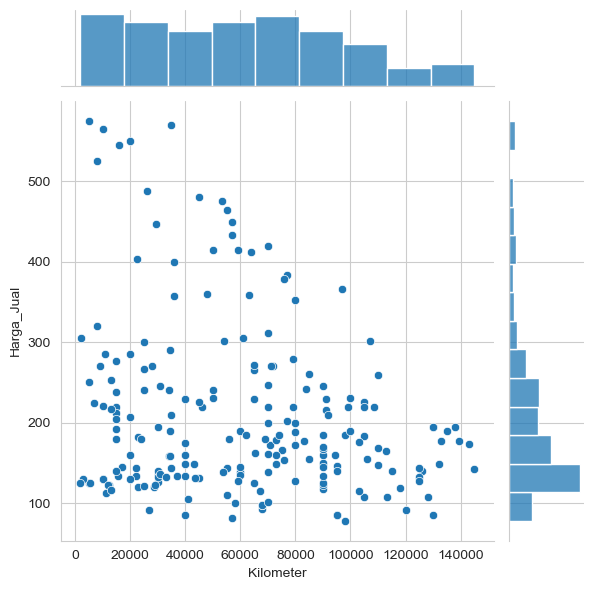

In [307]:
# Karena kami memiliki jumlah titik data yang sangat sedikit, kami hanya menghapus baris raw_df['Kilometer'] ==1700000.000000 

raw_df = raw_df.loc[raw_df['Kilometer'] !=170000.000000]

plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Kilometer',y = 'Harga_Jual')
plt.show()

In [308]:
raw_df.shape

(210, 9)

In [309]:
#Karena kami telah menghapus satu baris, kami mengatur ulang indeks
raw_df.reset_index(inplace=True)
raw_df.drop('index', axis =1, inplace= True)
raw_df

,Merk_Mobil,Tahun,Kilometer,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan,Harga_Saat_Ini,Harga_Jual
0,Daihatsu Ayla 1.0,2013,130000,Bensin,Dealer,Automatic,0,145,85
1,Daihatsu Ayla 1.0,2013,68000,Bensin,Individual,Automatic,0,145,92
2,Daihatsu Ayla 1.0,2014,40000,Bensin,Dealer,Automatic,0,145,85
3,Daihatsu Ayla 1.0,2014,98000,Bensin,Dealer,Manual,1,145,78
4,Daihatsu Ayla 1.0,2015,95000,Bensin,Individual,Manual,0,145,85
...,...,...,...,...,...,...,...,...,...
205,Toyota Rush G AT,2020,45000,Bensin,Individual,Automatic,0,290,225
206,Toyota Rush G AT,2020,25000,Bensin,Individual,Automatic,0,290,241
207,Toyota Rush G AT,2021,15000,Bensin,Dealer,Automatic,0,290,238
208,Toyota Rush G AT,2021,5000,Bensin,Dealer,Automatic,0,290,251


In [310]:
#Again percentiles
raw_df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])

,Tahun,Kilometer,Kepemilikan,Harga_Saat_Ini,Harga_Jual
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2017.123810,60589.076190,0.114286,326.161905,208.619048
std,2.679696,36921.791018,0.318918,156.077770,107.067513
min,2013.000000,1900.000000,0.000000,145.000000,78.000000
5%,2013.000000,9450.000000,0.000000,145.000000,98.900000
25%,2015.000000,29102.250000,0.000000,212.750000,134.000000
35%,2016.000000,40000.000000,0.000000,232.000000,146.150000
50%,2017.000000,59911.500000,0.000000,298.000000,177.000000
75%,2019.000000,90000.000000,0.000000,370.000000,241.750000
85%,2020.000000,101950.000000,0.000000,549.000000,301.300000


<Figure size 1000x1000 with 0 Axes>

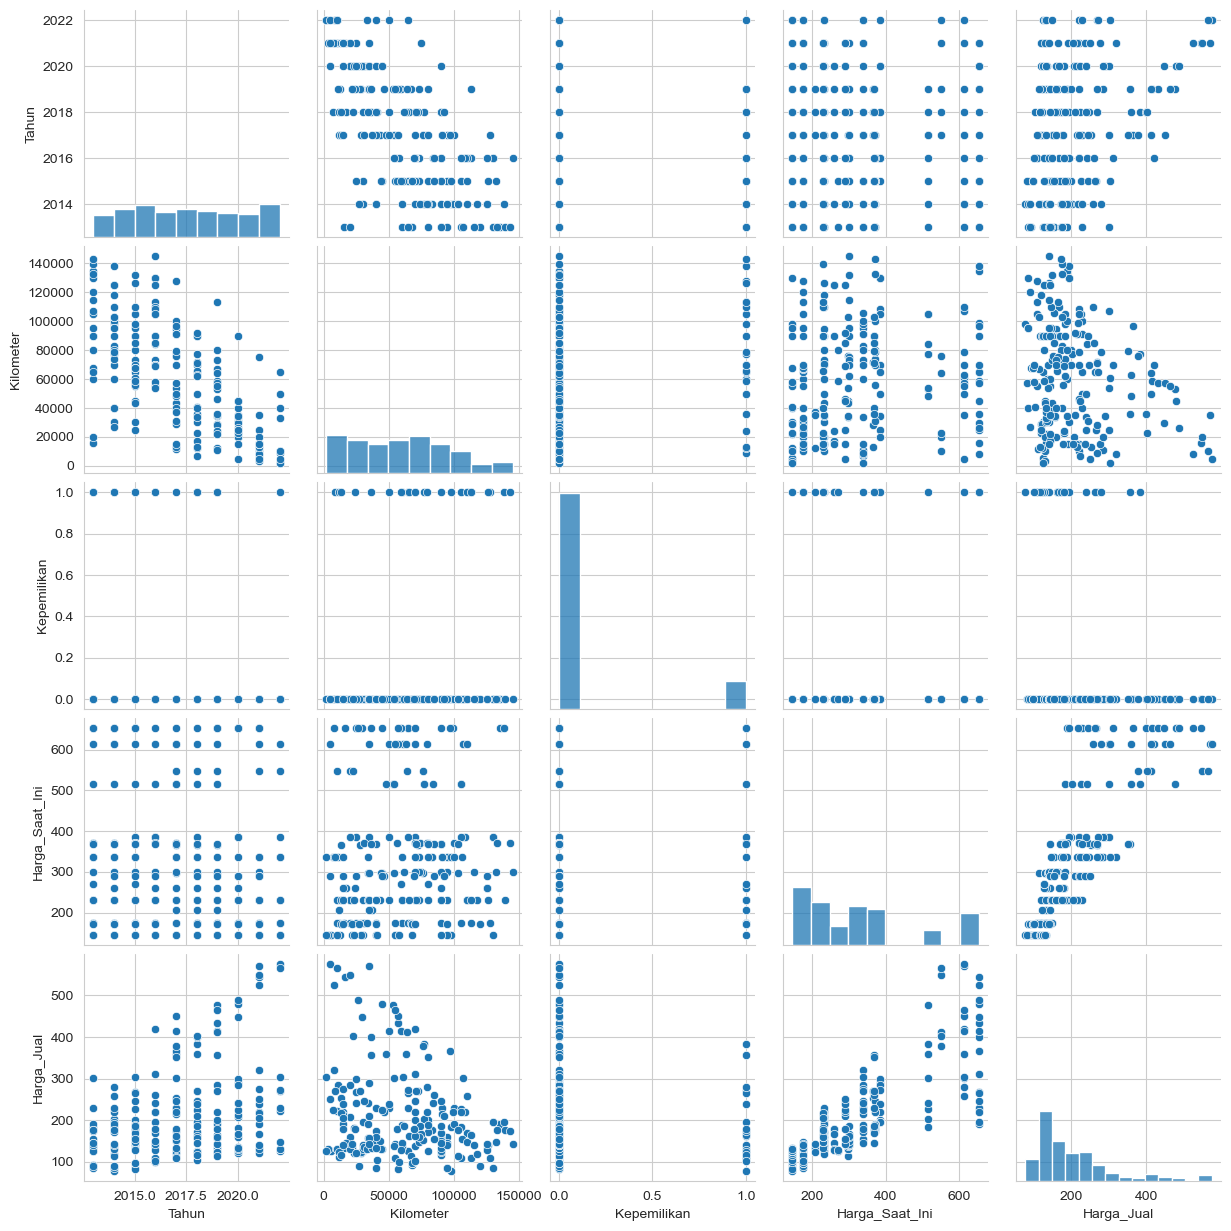

In [311]:
#Mari kita lakukan pairplot untuk melihat distribusi semua variabel numerik dengan harga jual
plt.figure(figsize =(10,10))
sns.pairplot(raw_df)
plt.show()

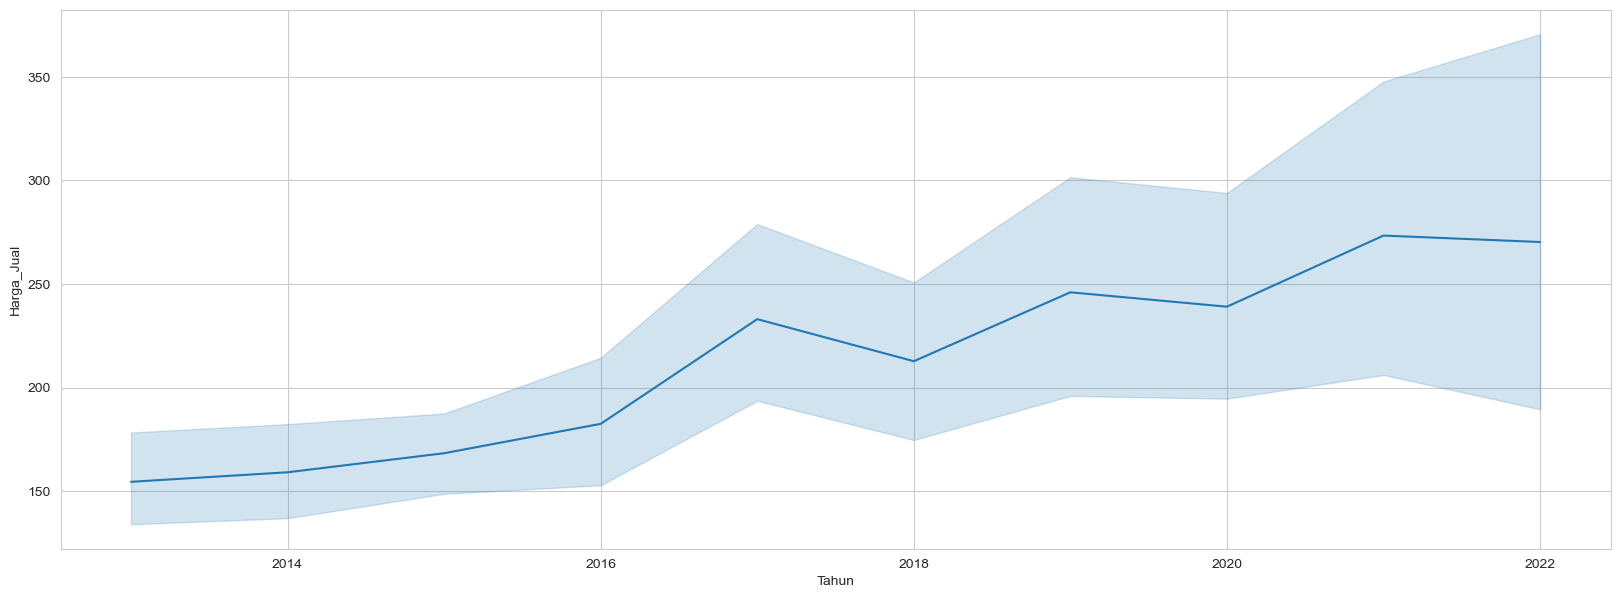

In [312]:
#Mari kita lihat tren harga jual dengan tahun

plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Tahun',y='Harga_Jual', markers=True)
plt.show()

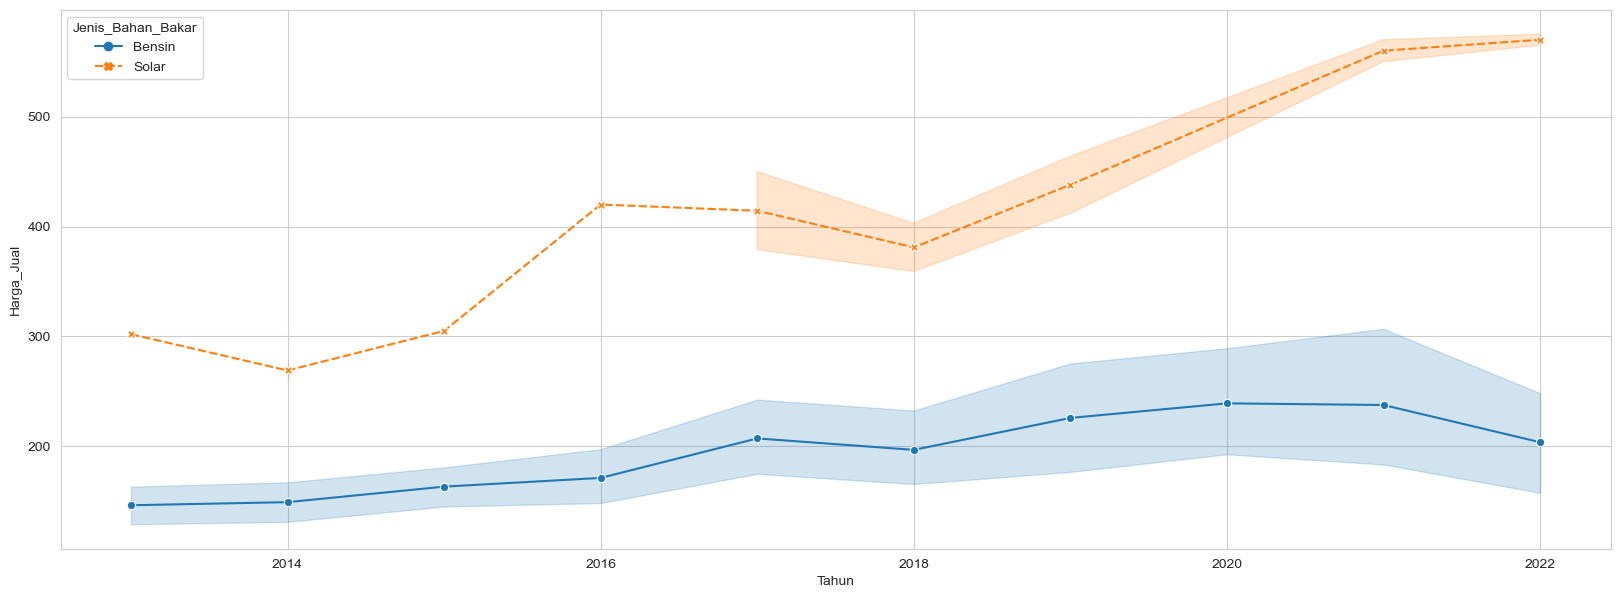

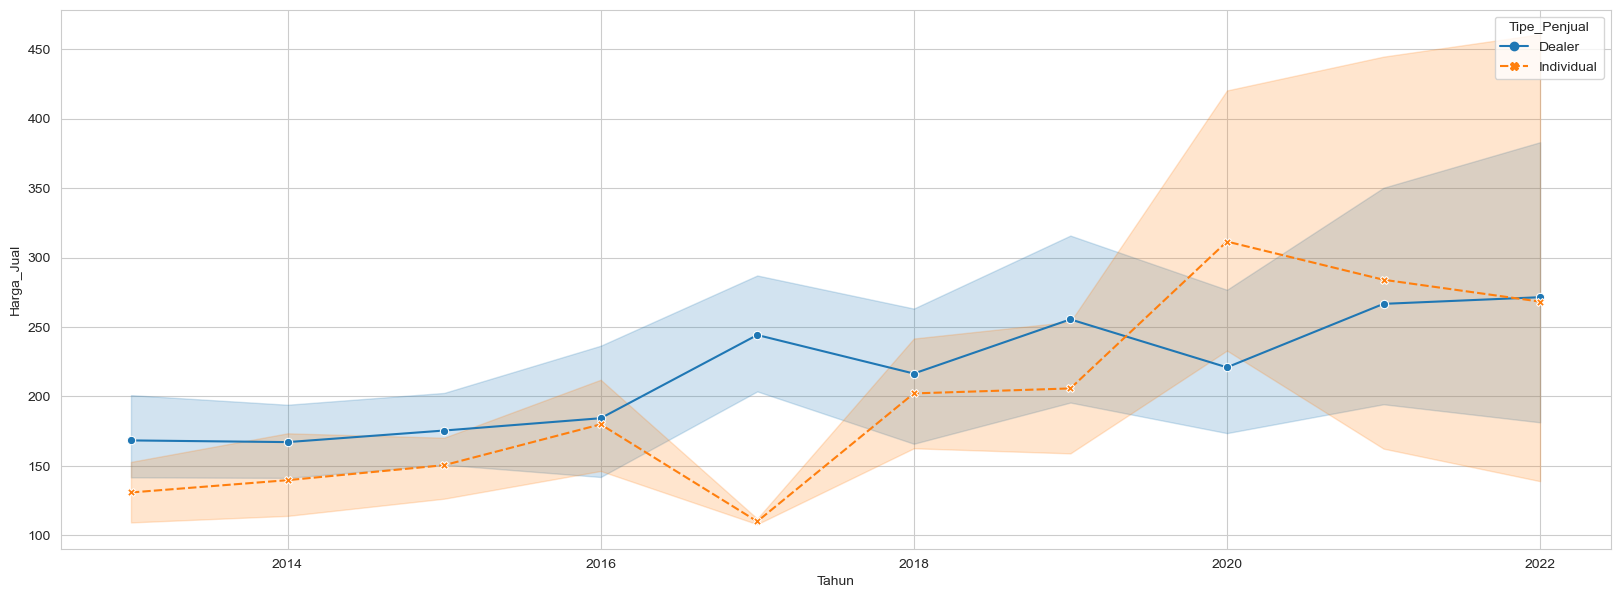

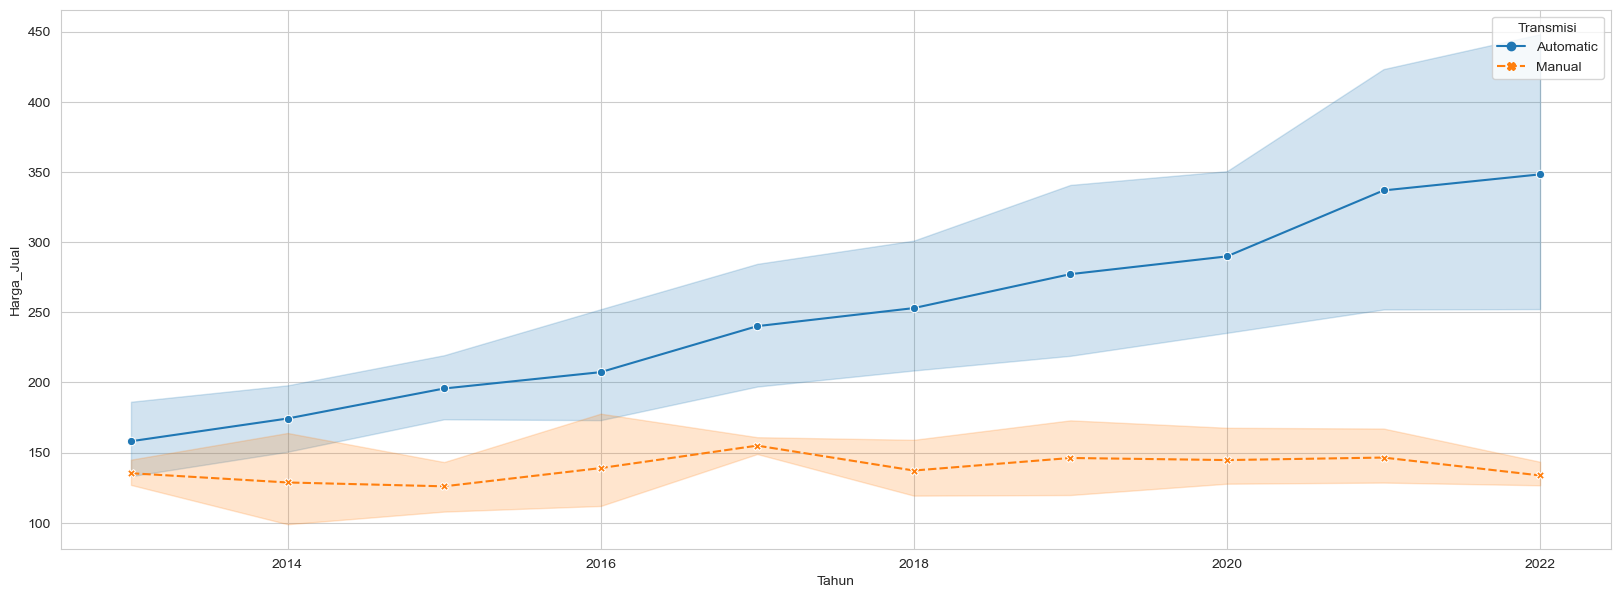

In [313]:
#Memeriksa tren harga jual sehubungan dengan cat_v
for i in [c for c in cat_v if c != 'Merk_Mobil']:
    plt.figure(figsize=(20,7))
    sns.lineplot(data =raw_df, x='Tahun',y='Harga_Jual',hue=i,style =i,markers= True) #hue - to see trend according to each value of a categorical variable
                                                                          #style - to se different line for different values
                                                                          # markers - to see the dotted points
    plt.show()

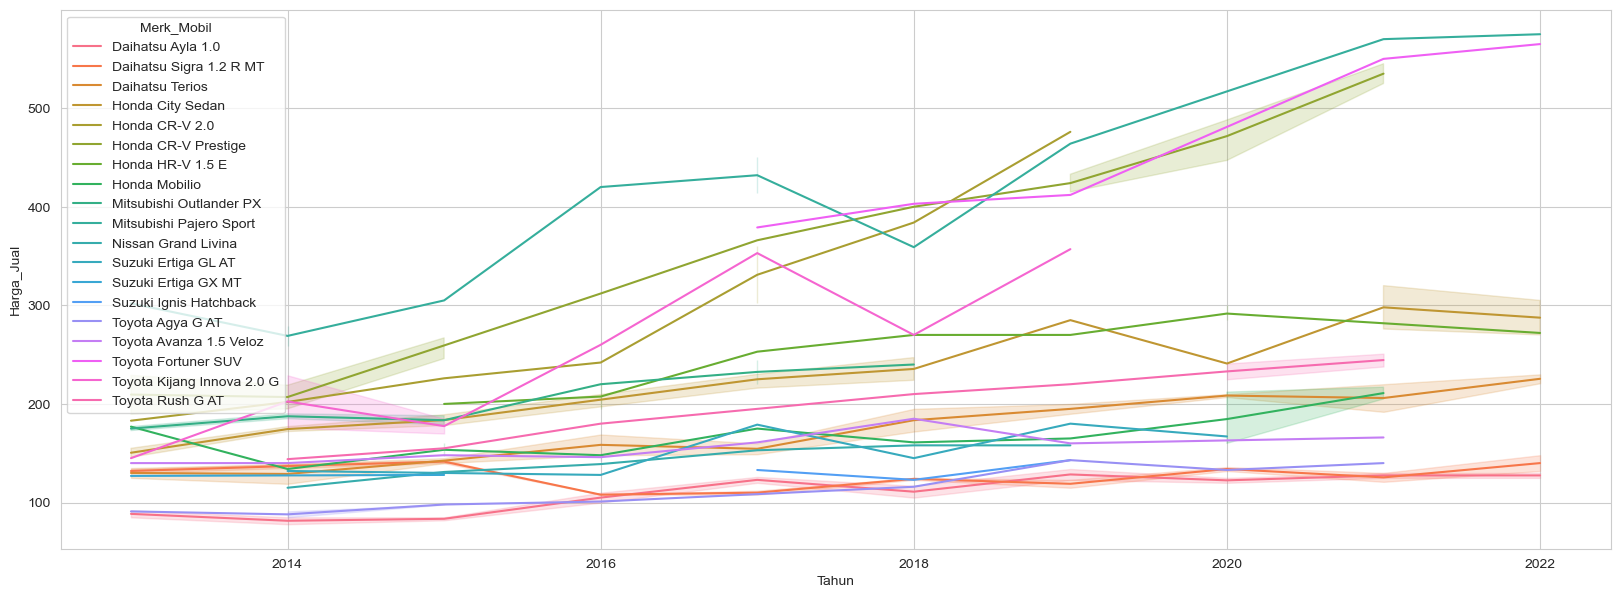

In [314]:
plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Tahun',y='Harga_Jual',hue='Merk_Mobil',estimator =np.mean,markers=True)
plt.show()

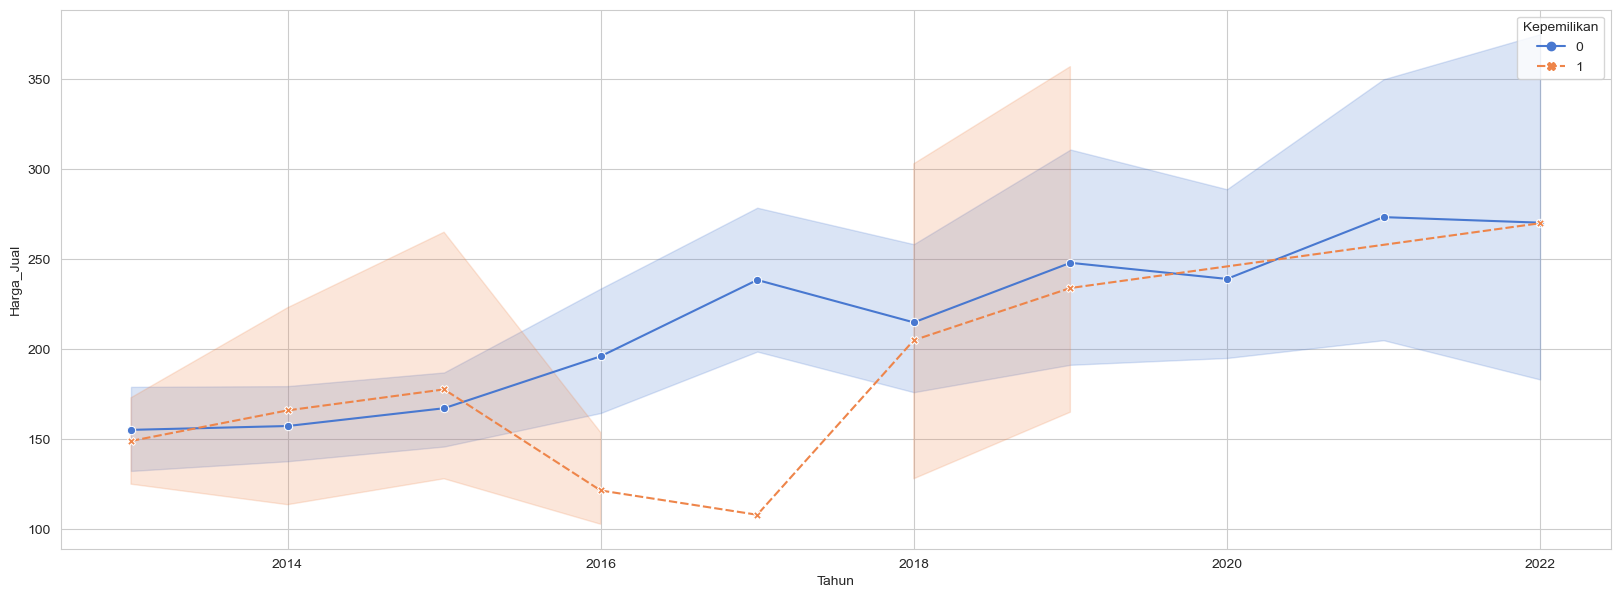

In [315]:
plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Tahun',y='Harga_Jual',hue='Kepemilikan',estimator =np.mean,style ='Kepemilikan',palette="muted",markers=True)
plt.show()

In [316]:
# Tahun - Tahun pembuatan
# Karenanya Kita dapat membuat variabel 'Umur' darinya
raw_df['Usia'] = 2022 - raw_df['Tahun']

#Dropping the 'Year' variable
raw_df.drop(['Tahun'], axis= 1,inplace= True)
raw_df.head()

,Merk_Mobil,Kilometer,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan,Harga_Saat_Ini,Harga_Jual,Usia
0,Daihatsu Ayla 1.0,130000,Bensin,Dealer,Automatic,0,145,85,9
1,Daihatsu Ayla 1.0,68000,Bensin,Individual,Automatic,0,145,92,9
2,Daihatsu Ayla 1.0,40000,Bensin,Dealer,Automatic,0,145,85,8
3,Daihatsu Ayla 1.0,98000,Bensin,Dealer,Manual,1,145,78,8
4,Daihatsu Ayla 1.0,95000,Bensin,Individual,Manual,0,145,85,7


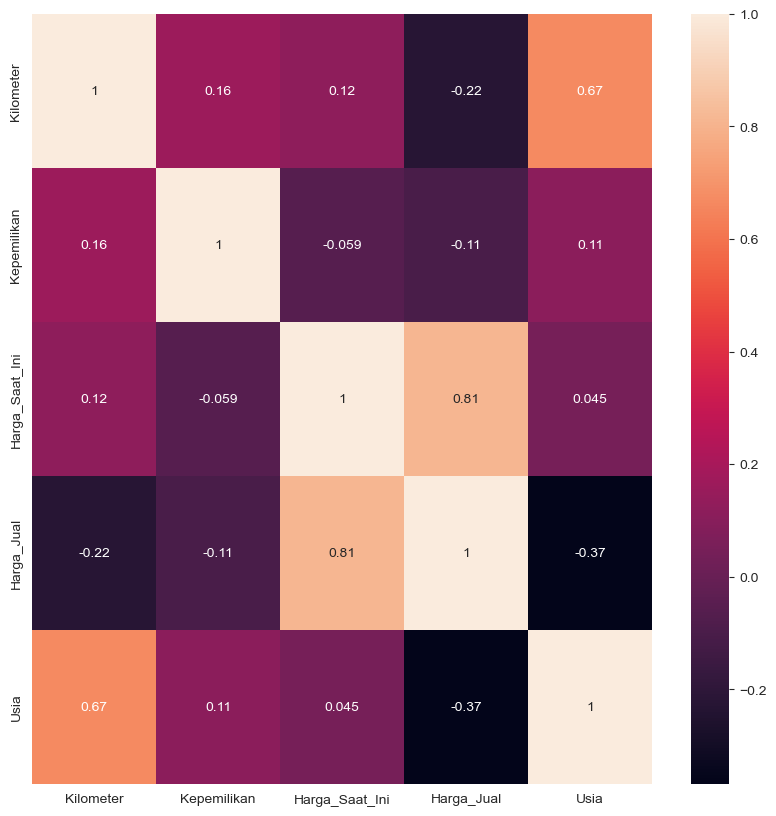

In [317]:
#Memeriksa korelasi

plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(),annot =True)
plt.show()

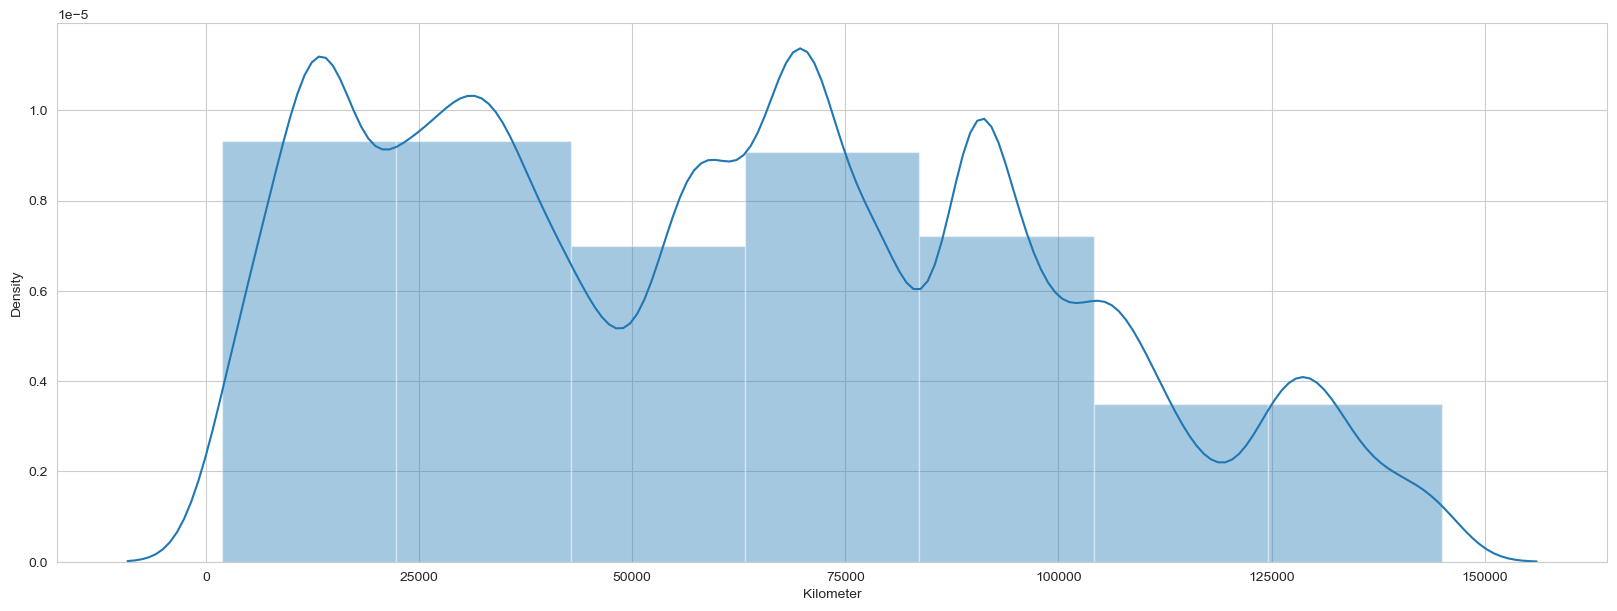

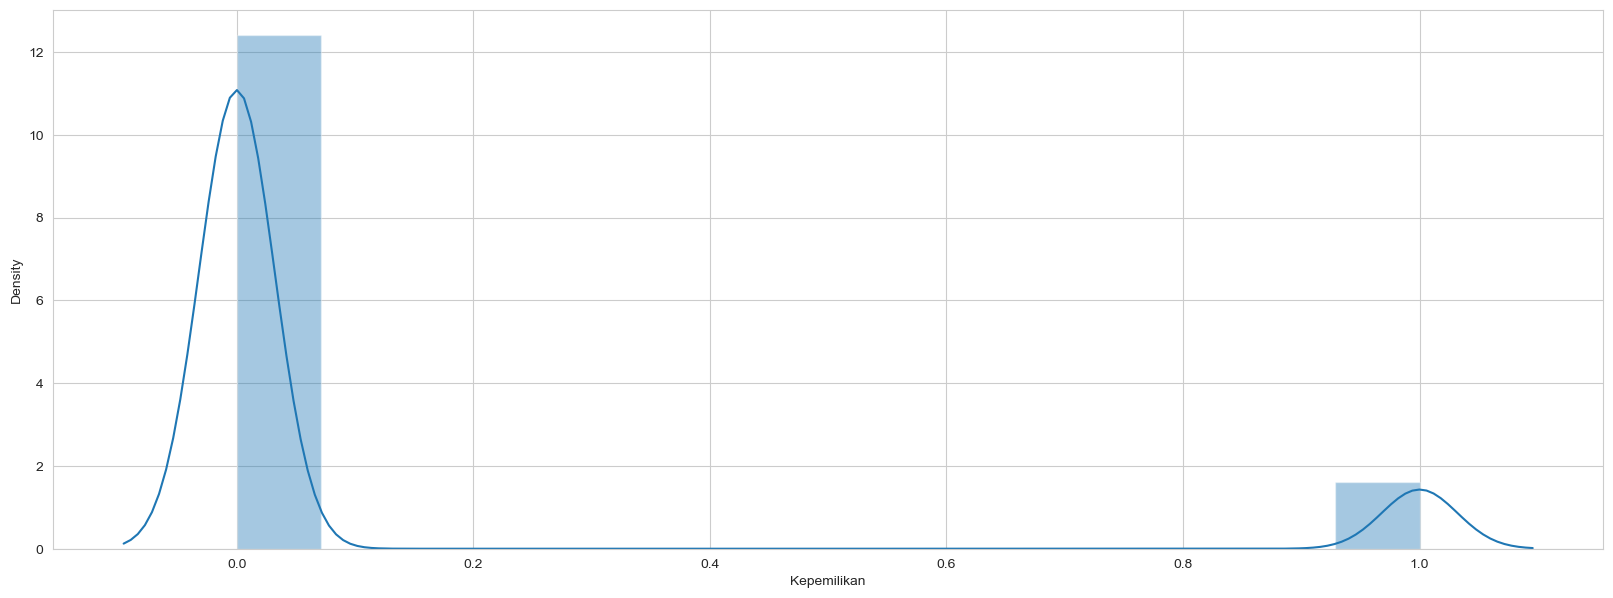

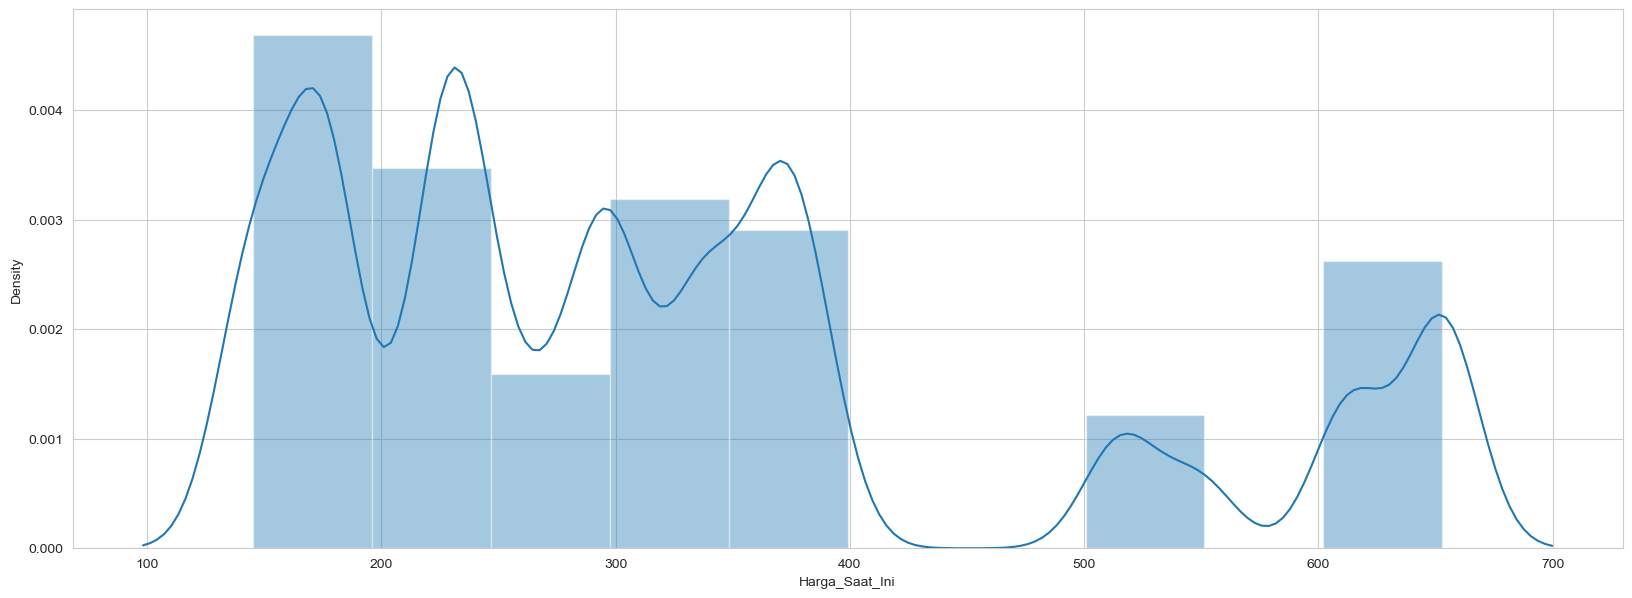

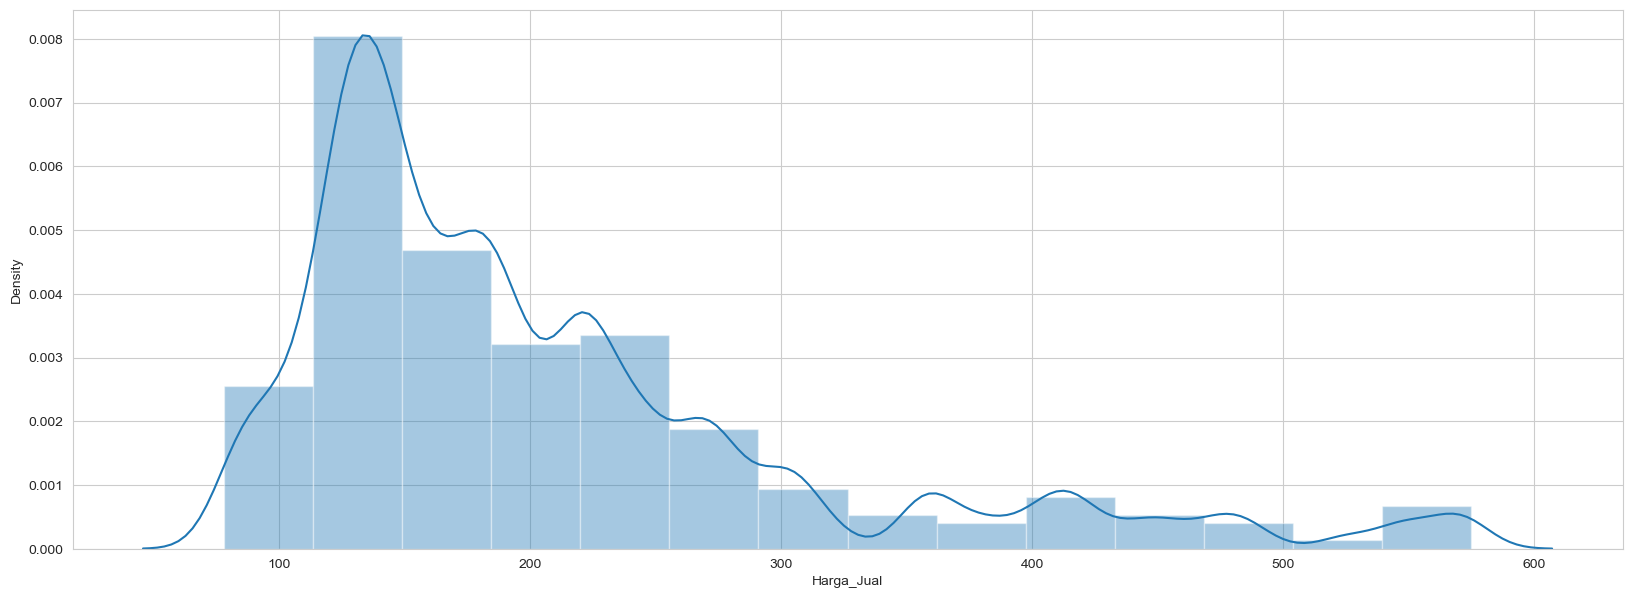

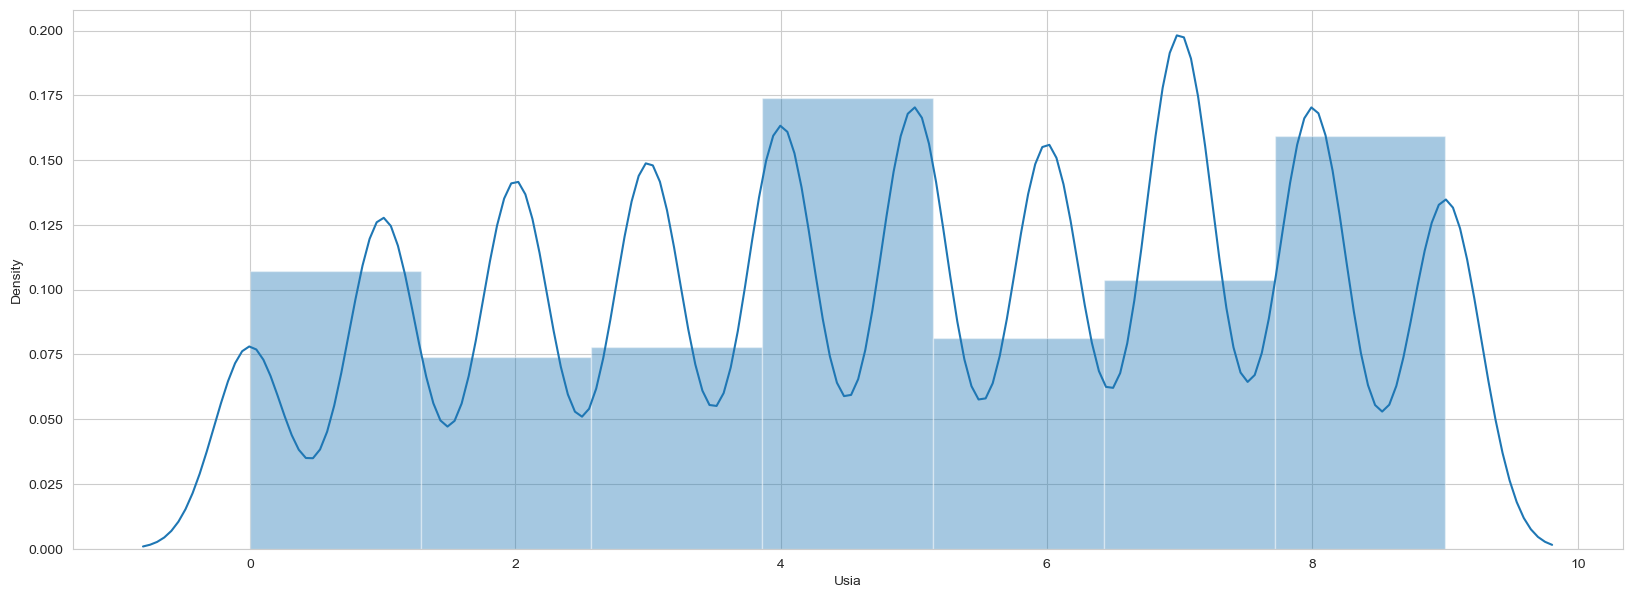

In [318]:
#Memeriksa distribusi setiap variabel numerik
num_v = [i for i in raw_df.columns if i not in cat_v]
for i in num_v:
    plt.figure(figsize=(20,7))
    sns.distplot(raw_df[i],kde_kws={'bw':0.1})

In [319]:
#Mengukur kemiringan
raw_df.skew(axis=0) # -ve sign ----- > left skewed
                    # +ve sign -----  > right skewed

Kilometer         0.289925
Kepemilikan       2.442150
Harga_Saat_Ini    0.899939
Harga_Jual        1.565407
Usia             -0.148159
dtype: float64

### Mengobati Kemiringan

In [320]:
# Treating skewness with PowerTransformer(method='yeo-johnson')
# ['Kms_Driven','Present_Price'] as 'Owner' has only 3 values (there is no continuity) and 'Age' is not that skewed

from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
power.fit(raw_df[['Kilometer','Harga_Saat_Ini']])
sk =pd.DataFrame(power.transform(raw_df[['Kilometer','Harga_Saat_Ini']]),columns = ['Kilometer','Harga_Saat_Ini'])
sk.head()

,Kilometer,Harga_Saat_Ini
0,1.620481,-1.640269
1,0.328369,-1.640269
2,-0.423111,-1.640269
3,0.997332,-1.640269
4,0.934771,-1.640269


In [321]:
sk.shape

(210, 2)

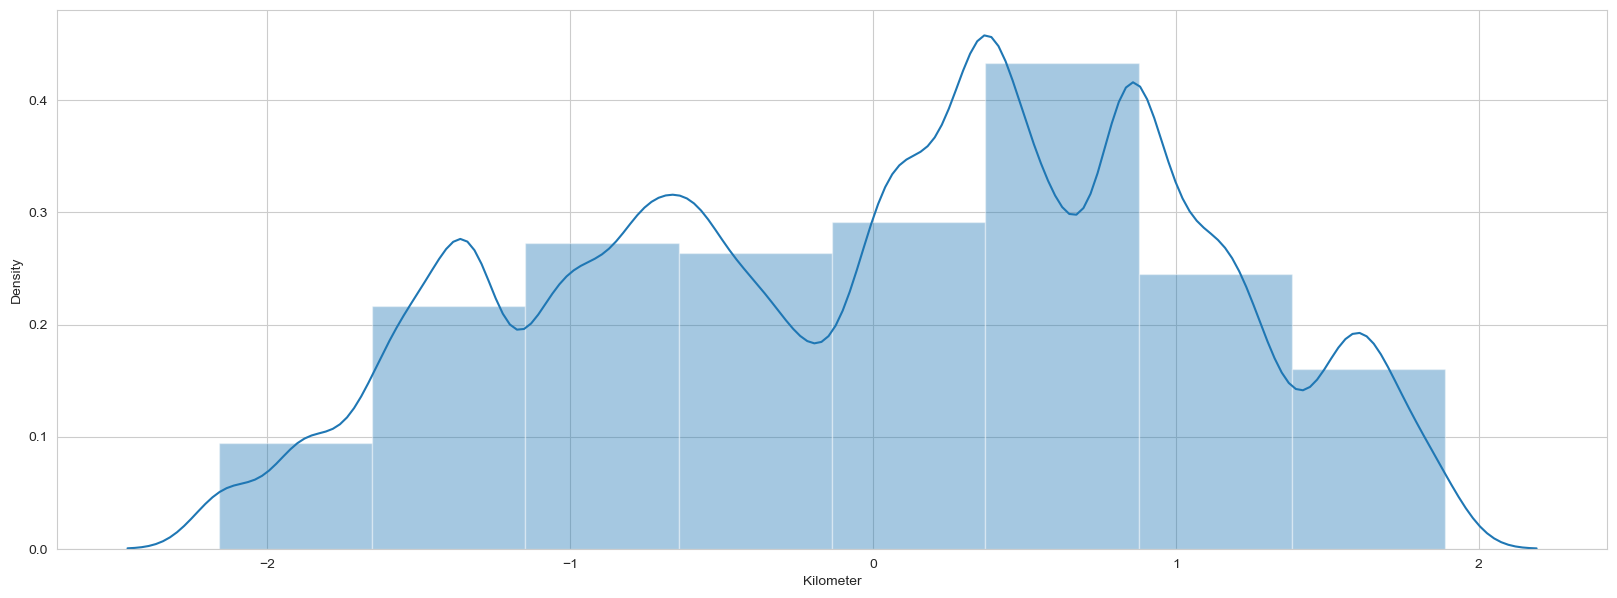

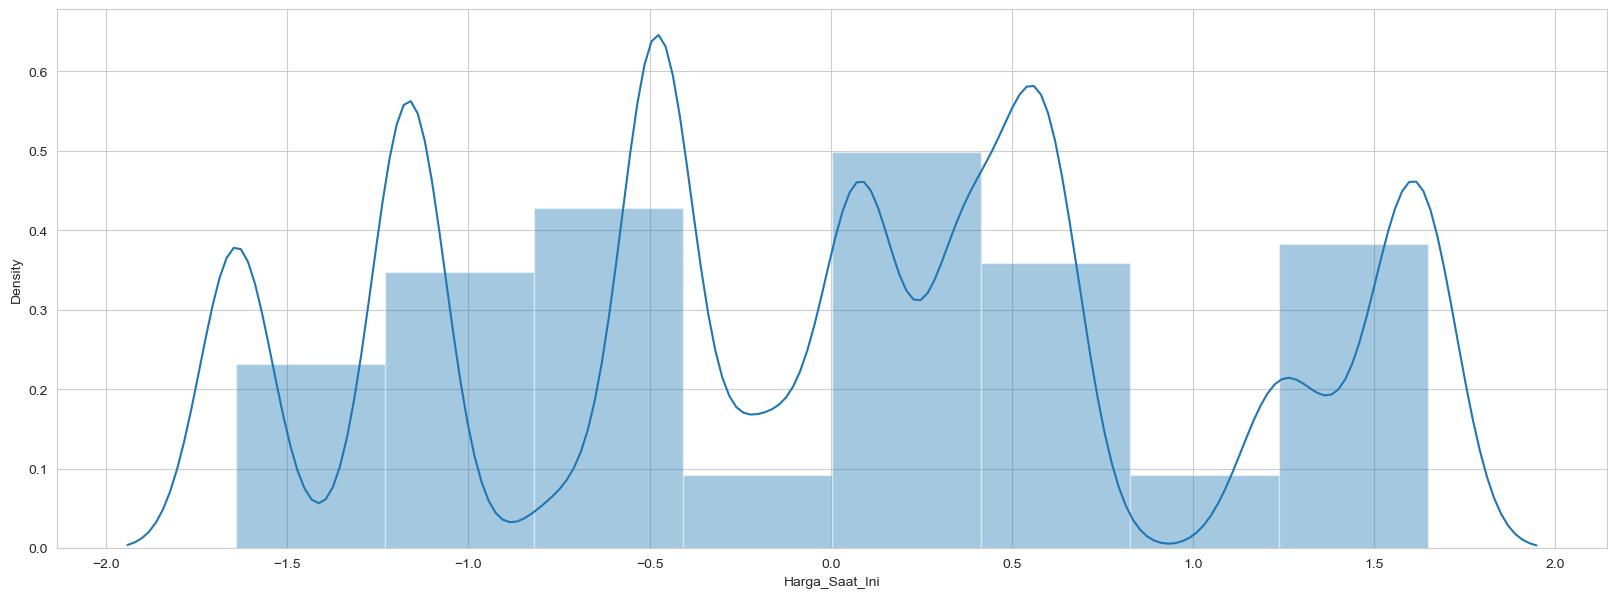

In [322]:
for i in ['Kilometer','Harga_Saat_Ini']:
    plt.figure(figsize=(20,7))
    sns.distplot(sk[i],kde_kws={'bw':0.1})

In [323]:
# Removing ['Kms_Driven','Present_Price']
raw_df.drop(['Kilometer','Harga_Saat_Ini'],axis =1, inplace =True)
df_sk = pd.concat([sk,raw_df],axis =1)
df_sk.head()

,Kilometer,Harga_Saat_Ini,Merk_Mobil,Jenis_Bahan_Bakar,Tipe_Penjual,Transmisi,Kepemilikan,Harga_Jual,Usia
0,1.620481,-1.640269,Daihatsu Ayla 1.0,Bensin,Dealer,Automatic,0,85,9
1,0.328369,-1.640269,Daihatsu Ayla 1.0,Bensin,Individual,Automatic,0,92,9
2,-0.423111,-1.640269,Daihatsu Ayla 1.0,Bensin,Dealer,Automatic,0,85,8
3,0.997332,-1.640269,Daihatsu Ayla 1.0,Bensin,Dealer,Manual,1,78,8
4,0.934771,-1.640269,Daihatsu Ayla 1.0,Bensin,Individual,Manual,0,85,7


### Memeriksa nilai yang hilang

In [324]:
#Checking for missing values
df_sk.isnull().sum()

Kilometer            0
Harga_Saat_Ini       0
Merk_Mobil           0
Jenis_Bahan_Bakar    0
Tipe_Penjual         0
Transmisi            0
Kepemilikan          0
Harga_Jual           0
Usia                 0
dtype: int64

### Tidak ada nilai hilang

### Merekayasa Fitur

In [325]:
cat_v

['Merk_Mobil', 'Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi']

In [326]:
num_v = [i for i in df_sk.columns if i not in cat_v]
num_v

['Kilometer', 'Harga_Saat_Ini', 'Kepemilikan', 'Harga_Jual', 'Usia']

In [327]:
#nilai unik di cat_v
for i in cat_v:
    print('Total number of unique values in {} is {}'.format(i, len(df_sk[i].unique())))

Total number of unique values in Merk_Mobil is 19
Total number of unique values in Jenis_Bahan_Bakar is 2
Total number of unique values in Tipe_Penjual is 2
Total number of unique values in Transmisi is 2


### Pengamatan:
#### 1. Semua variabel kategori adalah variabel kategori nominal atau tidak terurut
#### 2. Kita dapat menggunakan one hot encoding untuk Jenis_Bahan_Bakar, Tipe_Penjual, Transmisi karena dimensi kerangka data tidak akan besar
#### 3. Kita dapat menggunakan LeaveOneOutEncoder untuk Merk_Mobil seolah-olah kita menggunakan one hot encoding maka kita akan mendapatkan dataframe dengan dimensi yang sangat besar

In [328]:
#Encoding Jenis_Bahan_Bakar, Tipe_Penjual, Transmisi

dummy = pd.get_dummies(df_sk[['Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi']],drop_first= True)
dummy

,Jenis_Bahan_Bakar_Solar,Tipe_Penjual_Individual,Transmisi_Manual
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,1,1
...,...,...,...
205,0,1,0
206,0,1,0
207,0,0,0
208,0,0,0


In [329]:
df_t1 = pd.concat([dummy,df_sk],axis =1)
df_t1.drop(['Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi'],axis =1, inplace= True)
df_t1

,Jenis_Bahan_Bakar_Solar,Tipe_Penjual_Individual,Transmisi_Manual,Kilometer,Harga_Saat_Ini,Merk_Mobil,Kepemilikan,Harga_Jual,Usia
0,0,0,0,1.620481,-1.640269,Daihatsu Ayla 1.0,0,85,9
1,0,1,0,0.328369,-1.640269,Daihatsu Ayla 1.0,0,92,9
2,0,0,0,-0.423111,-1.640269,Daihatsu Ayla 1.0,0,85,8
3,0,0,1,0.997332,-1.640269,Daihatsu Ayla 1.0,1,78,8
4,0,1,1,0.934771,-1.640269,Daihatsu Ayla 1.0,0,85,7
...,...,...,...,...,...,...,...,...,...
205,0,1,0,-0.275593,0.036509,Toyota Rush G AT,0,225,2
206,0,1,0,-0.921341,0.036509,Toyota Rush G AT,0,241,2
207,0,0,0,-1.329558,0.036509,Toyota Rush G AT,0,238,1
208,0,0,0,-1.888528,0.036509,Toyota Rush G AT,0,251,1


In [330]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


### Alasan memilih LeaveOneOutEncoder
###### https://innovation.alteryx.com/encode-smarter/
###### https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark

In [331]:
from category_encoders.leave_one_out import LeaveOneOutEncoder
looe = LeaveOneOutEncoder(random_state = 10)
looe.fit(df_t1['Merk_Mobil'],df_t1['Harga_Jual'])

dum = looe.transform(df_t1['Merk_Mobil'])
dum

,Merk_Mobil
0,109.850000
1,109.850000
2,109.850000
3,109.850000
4,109.850000
...,...
205,207.111111
206,207.111111
207,207.111111
208,207.111111


In [332]:
df_t1.drop('Merk_Mobil', axis =1, inplace= True) # Dropping the Car_Name column
df_final= pd.concat([dum,df_t1],axis=1)
df_final

,Merk_Mobil,Jenis_Bahan_Bakar_Solar,Tipe_Penjual_Individual,Transmisi_Manual,Kilometer,Harga_Saat_Ini,Kepemilikan,Harga_Jual,Usia
0,109.850000,0,0,0,1.620481,-1.640269,0,85,9
1,109.850000,0,1,0,0.328369,-1.640269,0,92,9
2,109.850000,0,0,0,-0.423111,-1.640269,0,85,8
3,109.850000,0,0,1,0.997332,-1.640269,1,78,8
4,109.850000,0,1,1,0.934771,-1.640269,0,85,7
...,...,...,...,...,...,...,...,...,...
205,207.111111,0,1,0,-0.275593,0.036509,0,225,2
206,207.111111,0,1,0,-0.921341,0.036509,0,241,2
207,207.111111,0,0,0,-1.329558,0.036509,0,238,1
208,207.111111,0,0,0,-1.888528,0.036509,0,251,1


## Model Building

In [333]:
#Splitting into X and y

y = df_final.pop('Harga_Jual')
X = df_final
X

,Merk_Mobil,Jenis_Bahan_Bakar_Solar,Tipe_Penjual_Individual,Transmisi_Manual,Kilometer,Harga_Saat_Ini,Kepemilikan,Usia
0,109.850000,0,0,0,1.620481,-1.640269,0,9
1,109.850000,0,1,0,0.328369,-1.640269,0,9
2,109.850000,0,0,0,-0.423111,-1.640269,0,8
3,109.850000,0,0,1,0.997332,-1.640269,1,8
4,109.850000,0,1,1,0.934771,-1.640269,0,7
...,...,...,...,...,...,...,...,...
205,207.111111,0,1,0,-0.275593,0.036509,0,2
206,207.111111,0,1,0,-0.921341,0.036509,0,2
207,207.111111,0,0,0,-1.329558,0.036509,0,1
208,207.111111,0,0,0,-1.888528,0.036509,0,1


In [334]:
# columns of X
colx = X.columns
colx

Index(['Merk_Mobil', 'Jenis_Bahan_Bakar_Solar', 'Tipe_Penjual_Individual',
       'Transmisi_Manual', 'Kilometer', 'Harga_Saat_Ini', 'Kepemilikan',
       'Usia'],
      dtype='object')

In [335]:
#Spliting into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
X_train.head()

,Merk_Mobil,Jenis_Bahan_Bakar_Solar,Tipe_Penjual_Individual,Transmisi_Manual,Kilometer,Harga_Saat_Ini,Kepemilikan,Usia
112,247.500000,0,1,0,-0.921341,0.638666,0,2
69,224.666667,0,0,0,0.850041,0.361309,0,5
14,109.850000,0,0,1,-0.996459,-1.640269,0,2
166,133.000000,0,0,0,-1.473413,-0.741137,1,4
181,154.666667,0,1,0,1.889876,0.110948,0,6


In [336]:
print('Shape of X_train --- > {} and X_test --- > {}'.format(X_train.shape,X_test.shape))

Shape of X_train --- > (157, 8) and X_test --- > (53, 8)


In [337]:
print('Shape of y_train --- > {} and y_test --- > {}'.format(y_train.shape,y_test.shape))

Shape of y_train --- > (157,) and y_test --- > (53,)


In [338]:
def Mape(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [339]:
# Randomforest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 7, 'criterion': 'mse', 'bootstrap': False}


In [340]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [341]:
rf_model.fit(X_train, y_train);

In [342]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 16.924858490566095


In [343]:
r2 = r2_score(y_test,y_pred)
print ('R-Square Score: ', r2*100)

R-Square Score:  94.29961430913718


In [344]:
rf_mape= Mape(y_test,y_pred)
print("MAPE: ", round(rf_mape,2), '%.')

MAPE:  8.32 %.


In [345]:
rf_accuracy = 100 - np.mean(rf_mape)
print('Accuracy :', round(rf_accuracy, 2), '%.')

Accuracy : 91.68 %.


<AxesSubplot:xlabel='Harga_Jual', ylabel='Density'>

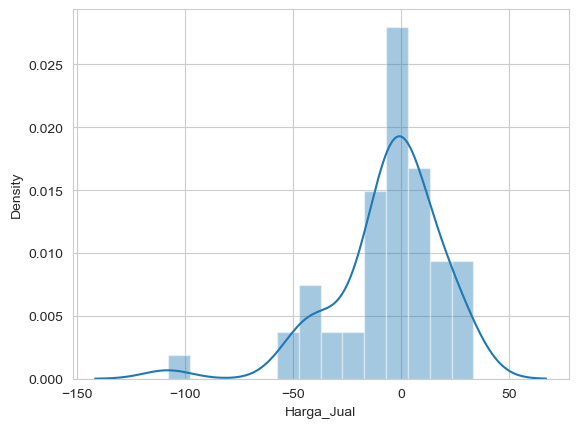

In [347]:
#Checking error distribution

sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='Harga_Jual'>

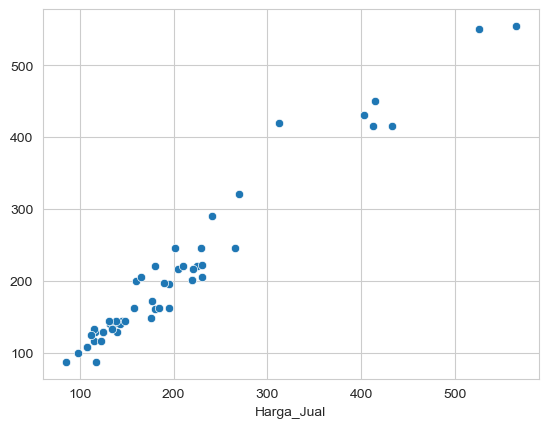

In [348]:
#Scatterplot

sns.scatterplot(y_test,y_pred)

In [349]:
#Saving the model

import pickle

file = open('rf_final.pkl','wb')
pickle.dump(rf_model,file)

In [350]:
#saving the transformer power

# filek = open('kms_present_transformer.pkl','wb')
pickle.dump(power,open('kms_present_transformer.pkl','wb'))

In [351]:
#saving the encoder

# filex = open('leave_one_out_encoder.pkl','wb')
pickle.dump(looe,open('leave_one_out_encoder.pkl','wb'))

### Testing pickle files

In [352]:
col_raw

Index(['Merk_Mobil', 'Tahun', 'Harga_Jual', 'Harga_Saat_Ini', 'Kilometer',
       'Jenis_Bahan_Bakar', 'Tipe_Penjual', 'Transmisi', 'Kepemilikan'],
      dtype='object')

In [353]:
transformer = pickle.load(open('kms_present_transformer.pkl','rb'))

transformer.transform([[45333,6.5]])

array([[ -0.26602075, -13.72456198]])

In [354]:
d = pd.DataFrame({'Merk_Mobil':['Daihatsu Ayla 1.0']})
d

,Merk_Mobil
0,Daihatsu Ayla 1.0


In [355]:
encoder = pickle.load(open('leave_one_out_encoder.pkl','rb'))
r = encoder.transform(d['Merk_Mobil'])
r                           

,Merk_Mobil
0,109.85


In [356]:
r['Merk_Mobil']

0    109.85
Name: Merk_Mobil, dtype: float64

In [357]:
x = r['Merk_Mobil']
x

0    109.85
Name: Merk_Mobil, dtype: float64

In [358]:
colx = X_train.columns
colx

Index(['Merk_Mobil', 'Jenis_Bahan_Bakar_Solar', 'Tipe_Penjual_Individual',
       'Transmisi_Manual', 'Kilometer', 'Harga_Saat_Ini', 'Kepemilikan',
       'Usia'],
      dtype='object')

In [359]:
model = pickle.load(open('rf_final.pkl','rb'))
model

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=7,
                      max_features=8, n_estimators=600)

In [360]:
X_train.iloc[0]

Merk_Mobil                 247.500000
Jenis_Bahan_Bakar_Solar      0.000000
Tipe_Penjual_Individual      1.000000
Transmisi_Manual             0.000000
Kilometer                   -0.921341
Harga_Saat_Ini               0.638666
Kepemilikan                  0.000000
Usia                         2.000000
Name: 112, dtype: float64

In [361]:
model.predict([[x,1.0,0.0,1.0,2.5,0.5,0.0,7.0]])

array([101.30666667])

In [362]:
model.predict([[x,1,1,1,5000,25,10,5]])

array([209.63])

In [363]:
h= transformer.transform([[5000,25]])
h

array([[-1.88852764, -7.4831721 ]])

In [364]:
model.predict([[x,1,1,1,h[0][0], h[0][1],3,5]])

array([128.4])